<a href="https://colab.research.google.com/github/aminemharzi/AdminLTE/blob/master/ProGAN_floor_plan_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/human_annotated_tags.zip -d /content/drive/MyDrive/human_annotated_tags


In [ ]:
# !unzip /content/drive/MyDrive/human_annotated_tags.zip -d /content/drive/MyDrive/human_annotated_tags


In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
import torch

# Check PyTorch GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU available: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU not available, using the CPU instead.")

# Example: moving a tensor to GPU
# tensor = tensor.to(device)


GPU available: NVIDIA L4


In [ ]:
import os
import cv2
import os
import time
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras # for building Neural Networks
from keras.models import Model, load_model # for assembling a Neural Network model
from keras.layers import Input, Dense, Embedding, Reshape, Concatenate, Flatten, Dropout # for adding layers
from keras.layers import Conv2D, Conv2DTranspose, MaxPool2D, ReLU, LeakyReLU,GaussianNoise # for adding layers
from tensorflow.keras.utils import plot_model # for plotting model diagram
from tensorflow.keras.optimizers import Adam # for model optimization

In [ ]:
embed_model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import os
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('wordnet')

# Define text directory
text_directory = '/content/drive/MyDrive/human_annotated_tags'

# Define spatial keywords
spatial_keywords = ["north", "south", "east", "west", "southwest", "southeast", "northeast", "northwest",
                    "top", "bottom", "left", "right", "in-front", "rear", "between", "center"]

# Define room types
room_types = ["master", "bedroom", "common", "bathroom", "kitchen", "living", "balcony"]

# Define a regular expression pattern to match dimensions (e.g., "15 ft. x 5 ft.")
dimension_pattern = r'(\d+)\s*ft\.\s*x\s*(\d+)\s*ft\.'

# Define a function to extract dimensions from a given text
def extract_dimensions(text):
    dimensions = re.findall(dimension_pattern, text)
    if dimensions:
        return [(int(length), int(width)) for length, width in dimensions]
    else:
        return None

# Initialize lists to store floor plans and descriptions
floor_plan = []
descriptions = []

# Iterate through text files in the directory
for file in os.listdir(text_directory):
    if os.path.isfile(os.path.join(text_directory, file)) and file.endswith('.txt'):
        floor_plan.append(file.replace('.txt', '.png'))

        # with open(os.path.join(text_directory, file), "r") as txt:
        #     text = txt.read()

        with open(os.path.join(text_directory, file), "r", encoding="utf-8") as txt:
            text = txt.read()

            # Preprocessing
            text = text.lower()  # Convert to lowercase
            text = text.replace(".", "")  # Remove full stops
            text = text.replace("\n", " ")  # Remove '\n' characters

            # Tokenization
            tokens = text.split()

            # Extract spatial information and room type
            spatial_info = [word for word in tokens if word in spatial_keywords]
            tokens = [word for word in tokens if word not in spatial_info]
            room_type = next((word for word in tokens if word in room_types), "")

            # Remove stop words
            stop_words = set(stopwords.words('english'))
            tokens = [word for word in tokens if word not in stop_words]

            # Lemmatization
            lemmatizer = WordNetLemmatizer()
            tokens = [lemmatizer.lemmatize(word) for word in tokens]

            # Join tokens back into preprocessed text
            text = ' '.join(tokens)

            # Extract dimensions
            dimensions = extract_dimensions(text)

            # Encode spatial information, room type, and dimensions into description
            spatial_embedding = " ".join(spatial_info)
            if dimensions:
                dimensions_str = ", ".join([f"{length} ft. x {width} ft." for length, width in dimensions])
                description = f"{room_type} - {text} [DIMENSIONS: {dimensions_str}] [SPATIAL: {spatial_embedding}]"
            else:
                description = f"{room_type} - {text} [SPATIAL: {spatial_embedding}]"

            descriptions.append(description)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(floor_plan)

['10298.png', '1030.png', '1011.png', '10424.png', '10107.png', '10463.png', '10053.png', '10513.png', '10201.png', '10457.png', '10433.png', '10042.png', '10241.png', '10089.png', '10218.png', '10344.png', '10526.png', '10312.png', '10047.png', '10501.png', '1029.png', '10073.png', '10274.png', '10079.png', '10045.png', '10017.png', '10384.png', '10077.png', '10131.png', '10473.png', '10500.png', '10052.png', '1268.png', '13141.png', '14517.png', '1064.png', '11676.png', '1286.png', '12952.png', '11846.png', '1073.png', '12162.png', '11200.png', '12421.png', '11323.png', '1335.png', '12376.png', '14049.png', '13422.png', '13613.png', '13780.png', '13322.png', '13896.png', '14198.png', '13371.png', '11363.png', '11908.png', '13831.png', '13711.png', '12780.png', '13076.png', '13787.png', '11532.png', '13436.png', '1419.png', '11181.png', '12693.png', '12043.png', '11814.png', '14333.png', '11883.png', '10946.png', '13098.png', '14060.png', '12981.png', '13519.png', '14546.png', '14388.

In [ ]:
print(descriptions[100])

balcony - balcony 1 located side home near bathroom 10 ft long 4 ft wide balcony 2 located southeastern corner home access living room common room 8 ft long 3 ft wide bathroom located side home near balcony 1 10 ft long 8 ft wide common room located side home access living room next balcony 2 13 foot wide 15 foot long kitchen located western corner home access living room 12 foot wide 8 ft long living room located northeastern corner home living room access kitchen, balcony 2, common room, master room, bathroom, kitchen door living room located side home 35 ft width 30 ft length master room located southwestern corner home next common room 15 ft length 15 ft width [SPATIAL: west west south north north]


In [ ]:
import cv2
import os

images = []
dir_path = '/content/drive/MyDrive/floor_Data/General Data/floorplan_image'
description_match=[]
for img in floor_plan:
    image_path = os.path.join(dir_path, img)

    # Check if the image file exists
    if os.path.isfile(image_path):
        # Attempt to load the image
        image = cv2.imread(image_path)


        # Check if the image is loaded successfully
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_lowres = cv2.resize(image, (128, 128))
            images.append(image_lowres)
            description_match.append(img)
        else:
            print(f"Error loading image: {image_path}")
    else:
        print(f"Image file not found: {image_path}")


In [ ]:
print(len(images))
print(len(descriptions))

400
400


Shape of data_lowres:  (128, 128, 3)
balcony - balcony located corner, next living common 1 , size room 4 foot width 19 foot length bathroom 1 located side, inside master room corner , size room 4 foot width 6 foot length bathroom 2 located side, bath 1 common 2 , size room 4 foot width 4 foot length common room 1 located side, living master, size room 8 foot width 11 foot length common room 2 located corner, kitchen bath 2, size room 9 foot width 9 foot length kitchen located corner, next living room next common 2, size room 4 foot width 11 foot length living room located side, front room , size room 10 foot width 17 foot length master room located corner, next living room bath 1 common 1, size room 10 foot width 14 foot length [SPATIAL: southwest east northwest east between south between northeast between northwest west southwest between]


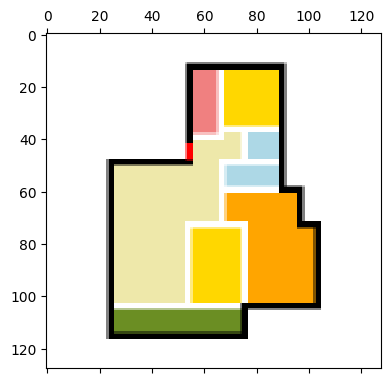

In [ ]:
# display = 120
# print("Shape of data_lowres: ", images[2].shape)
# print(descriptions[display])

# fig, axs = plt.subplots(sharey=False, tight_layout=True, figsize=(4,4), facecolor='white')
# display_FloorPlan = images[display]
# axs.matshow(display_FloorPlan)

import matplotlib.pyplot as plt

display = 120
print("Shape of data_lowres: ", images[2].shape)
print(descriptions[display])

fig, axs = plt.subplots(sharey=False, tight_layout=True, figsize=(4,4), facecolor='white')
display_FloorPlan = images[display]
axs.matshow(display_FloorPlan)
plt.show()


In [ ]:
images = np.array(images, dtype="float")
from sentence_transformers import SentenceTransformer
descriptions = np.array(descriptions)
raw_descriptions = descriptions.copy()
descriptions = embed_model.encode(descriptions)
print(descriptions[0])

[ 9.69957411e-02 -7.92602226e-02  9.04388651e-02 -5.51188327e-02
 -4.28226404e-02  6.54647425e-02 -7.48698786e-02 -2.14236658e-02
 -4.65174764e-02 -2.30883546e-02 -4.31662367e-04  1.71648730e-02
  4.56504114e-02  4.65207584e-02 -1.81310321e-03 -4.37818132e-02
  2.18528546e-02  2.23211702e-02  3.64835858e-02  3.61675248e-02
  7.04737520e-03 -1.01843616e-02  4.25581224e-02 -1.22029362e-02
  4.89604613e-03  7.79113397e-02  5.18431067e-02  3.28405201e-02
 -4.36544232e-03 -6.66000694e-02  3.84576991e-02  6.35131896e-02
 -1.46129343e-03 -4.16397303e-02  3.23493443e-02 -9.11116302e-02
 -5.37772588e-02  7.55387023e-02  9.38451365e-02 -2.27700919e-02
 -5.80003075e-02 -1.93317048e-02  7.81839117e-02  1.82085298e-02
  3.86712477e-02  1.89231299e-02 -1.28533974e-01 -8.56434088e-03
  3.59417847e-03 -6.17995560e-02 -1.95905138e-02 -1.96511336e-02
 -4.40535881e-02  1.44943193e-01  4.07796055e-02 -7.53879314e-03
 -2.74659321e-02 -7.79649168e-02  7.30794519e-02 -9.80768818e-03
  5.56249991e-02 -1.54540

In [ ]:
images[0].shape

(128, 128, 3)

In [ ]:
train_images, test_images , train_embeddings, test_embeddings, train_descriptions, test_descriptions = train_test_split(images,descriptions,raw_descriptions, test_size=0.2,random_state=42)

In [ ]:
# Assuming you want to reduce the dimension to 256
new_embed_dim = 256

# Reduce the dimension of train_embeddings
train_embeddings_reduced = train_embeddings[:, :new_embed_dim]

# Print the new shape
print(train_embeddings_reduced.shape)

(320, 256)


In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'final-floor-plan-project-with-progan:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4722934%2F8016181%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240407%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240407T184016Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D65262896402c6d37b5de92c4ddcd82be4bd5877f11b9baa4cbe9c486694b6c1d13cffb110c120f83e70a5d70c6da91c222dced463fb2f3eb9f710cd21172f1181970468bbd6cf6d05e706b13e4c8600c433445b68bb663c9e122cec8ef82dbce17b4433fb7aab4b22890431e1f4c78ab7fb599e8039a3f328ca043fc1c9f0f2a4a0597d36f97af5b08faf0dcce422866b76afe9a514905bcf6a6e6cffd25920f44dfa90b03af3125822c002e336a834ebaa23131b33fb3460e02d2eb8efc7f9093a314062838ca235118c0fe7fa08fd7d1f53008ea605a500e704eab73f0a899645d8e248b7d47ab9be9291d3393c2f90528dc19838cdcfa72ec7421b1b99c51,train-floor-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4726218%2F8020707%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240407%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240407T184016Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D98acf84ca1b8cb56e4d136e18157d131631523289d0630848c9e83a557ee85ced1be584a5d9dd3366917c38efe4cd4696142611e4084ea67dc7351ff77e8ed34ad422ac57de22154ed3e46864d4a5035ec6d0488942ec8d5ae0fed805df72b24fb7e537ff5a3744ffbd3107cde98b6a2cc689049a048ff0ad5dd87a521554409cf0e699c1114b0c1465b75b78476ee93ac69dfdb28c3c398ceac1b94ce3c85f5dda3d6b622a97be60c01b4ef57054d6b9009bfe4ec0b1593b129e94e78f487b9efe17c5ccbf66d6ee56dc018a640327d98407f774e4b1e70ea3339d340b92a6be576b0f169ac8b99cee8fe61b5fd6dde4f2636e3449bdd455f3ce4634a56593c,train-test:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4733869%2F8031326%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240407%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240407T184016Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3b7a2a4d88584c02cfcf263d8c7f0661e71f94a99eafe55328c413a3128f0f518ed927839e375850cc03af6e92c4562bc2b39b6b712e0478f31a5678ed8cf2b107849a1b89bdfc70b291bf25ed633c14ce063f750c0ff4a589f5df5bc724a2363795183ab1b5d11910d9a742715b789627be8aee36b5994caef7458a4778599786e3d0d1822701b5a474a8116954ba46c915df3f5b0c1e92168ea9cff3e21ccbd0cb821331c6585eff6f475b026e110a06c4f85a9c154a190fdaaa6a64534c59b778f37a6f46dcaa9acefc0a7fa5ecece66a4cc60410423ce2406baa34f15f5af2b8e57ff2c3062302649c4a6fc3385dd032982ad635772fda92dbd064b75cdc'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 98492346 bytes downloaded
Downloaded and uncompressed: final-floor-plan-project-with-progan
[==================================================] 10552211 bytes downloaded
Downloaded and uncompressed: train-floor-data
[==================================================] 95138528 bytes downloaded
Downloaded and uncompressed: train-test
Data source import complete.


In [ ]:
np.save('/kaggle/input/train-floor-data/train_images.npy',train_images)
np.save('/kaggle/input/train-floor-data/train_embeddings.npy',train_embeddings_reduced)
np.save('/kaggle/input/train-floor-data/train_descriptions.npy',train_descriptions)


NameError: name 'train_images' is not defined

In [ ]:
import cv2
import os
from tensorflow import keras
import time
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sentence_transformers import SentenceTransformer
from tqdm import tqdm
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
from keras.models import Model, load_model # for assembling a Neural Network model
from keras.layers import Input, Dense, Embedding, Reshape, Concatenate, Flatten, Dropout # for adding layers
from keras.layers import Conv2D, Conv2DTranspose, MaxPool2D, ReLU, LeakyReLU,GaussianNoise # for adding layers
from tensorflow.keras.utils import plot_model # for plotting model diagram
from tensorflow.keras.optimizers import Adam # for model optimization
from tensorflow.keras.utils import plot_model


In [ ]:
train_images = np.load('/kaggle/input/train-floor-data/train_images.npy')
train_embeddings_reduced = np.load('/kaggle/input/train-floor-data/train_embeddings.npy')
train_descriptions = np.load('/kaggle/input/train-floor-data/train_descriptions.npy')

In [ ]:
print(train_images.shape, len(train_images))
print(train_descriptions.shape, len(train_descriptions))
print(train_embeddings_reduced.shape, len(train_embeddings_reduced))

(3202, 128, 128, 3) 3202
(3202,) 3202
(3202, 256) 3202


In [ ]:
#normalizing the images
train_images /= 127.5
train_images -= 1

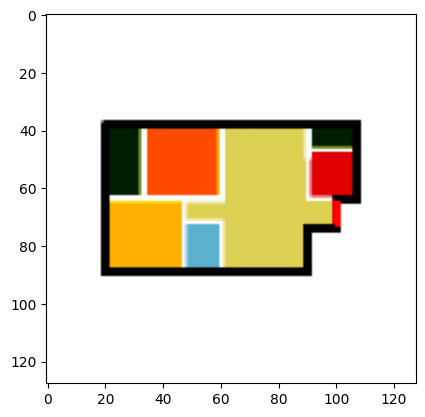

In [ ]:
plt.imshow(train_images[2])

In [ ]:
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, num_heads, key_dim, **kwargs):
        super(MultiHeadSelfAttention, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.key_dim = key_dim

    def build(self, input_shape):
        self.embedding_dim = input_shape[-1]
        self.embedding_dim -= self.embedding_dim % self.num_heads  # Adjust the embedding_dim
        assert self.embedding_dim % self.num_heads == 0

        self.projection_dim = self.embedding_dim // self.num_heads
        self.query_dense = layers.Dense(self.embedding_dim)
        self.key_dense = layers.Dense(self.embedding_dim)
        self.value_dense = layers.Dense(self.embedding_dim)

        self.combine_heads = layers.Dense(self.embedding_dim)


    def call(self, inputs):
        # Split the embedding into num_heads different heads
        query = tf.transpose(tf.reshape(self.query_dense(inputs), (-1, tf.shape(inputs)[1], self.num_heads, self.projection_dim)), perm=[0, 2, 1, 3])
        key = tf.transpose(tf.reshape(self.key_dense(inputs), (-1, tf.shape(inputs)[1], self.num_heads, self.projection_dim)), perm=[0, 2, 1, 3])
        value = tf.transpose(tf.reshape(self.value_dense(inputs), (-1, tf.shape(inputs)[1], self.num_heads, self.projection_dim)), perm=[0, 2, 1, 3])

        # Calculate attention scores
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores = tf.multiply(attention_scores, 1.0 / tf.math.sqrt(tf.dtypes.cast(self.projection_dim, attention_scores.dtype)))
        attention_probs = tf.nn.softmax(attention_scores, axis=-1)

        # Apply attention to the values
        output = tf.matmul(attention_probs, value)
        output = tf.transpose(output, perm=[0, 2, 1, 3])

        # Concatenate the heads and apply a final linear layer
        output = tf.reshape(output, (-1, tf.shape(output)[1], self.embedding_dim))
        output = self.combine_heads(output)

        return output



In [ ]:
class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, embed_dim):
        super(SelfAttention, self).__init__()
        self.query = tf.keras.layers.Dense(embed_dim)
        self.key = tf.keras.layers.Dense(embed_dim)
        self.value = tf.keras.layers.Dense(embed_dim)
        self.softmax = tf.keras.layers.Softmax(axis=-1)

    def call(self, inputs):
        q = self.query(inputs)
        k = self.key(inputs)
        v = self.value(inputs)

        attention_scores = tf.matmul(q, k, transpose_b=True)
        attention_scores = attention_scores / tf.math.sqrt(tf.cast(tf.shape(k)[-1], tf.float32))
        attention_weights = self.softmax(attention_scores)

        output = tf.matmul(attention_weights, v)
        return output

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.3 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras import regularizers

In [ ]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output, fake_output_imagess):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    real_loss = bce(tf.ones_like(real_output), real_output)
    fake_loss = bce(tf.zeros_like(fake_output), fake_output)
    fake_loss_captions = bce(tf.zeros_like(fake_output_imagess), fake_output_imagess)

    total_loss = (fake_loss + fake_loss_captions) + real_loss

    return total_loss

def generator_loss(fake_output, fake_output_imagess):
    gen_loss1 = -tf.reduce_mean(fake_output)
    gen_loss2 = -tf.reduce_mean(fake_output_imagess)

    gen_loss = (gen_loss1 + gen_loss2) / 2

    return gen_loss


In [ ]:
version = 4.0

In [ ]:
data = tf.data.Dataset.from_tensor_slices((train_images, train_embeddings_reduced,train_descriptions))

data = data.shuffle(buffer_size=30)
# data = data.batch(batch_size=batch_size)

In [ ]:
data_list = list(data)

In [ ]:
data_list[0][0].shape

TensorShape([128, 128, 3])

In [ ]:
len(data_list[:])

3202

In [ ]:
from math import sqrt
from numpy import load, asarray, zeros, ones, savez_compressed
from numpy.random import randn, randint
from skimage.transform import resize
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D
from tensorflow.keras.layers import UpSampling2D, AveragePooling2D, LeakyReLU, Layer, Add
from keras.constraints import max_norm
from keras.initializers import RandomNormal

from keras import backend
from matplotlib import pyplot
import cv2
import os
from os import listdir
from PIL import Image
import cv2

In [ ]:
img_dim =128

In [ ]:
import tensorflow as tf

class PixelNormalization(tf.keras.layers.Layer):
    # initialize the layer
    def __init__(self, **kwargs):
        super(PixelNormalization, self).__init__(**kwargs)

    # perform the operation
    def call(self, inputs):
        # computing pixel values
        values = inputs**2.0
        mean_values = tf.reduce_mean(values, axis=-1, keepdims=True)
        mean_values += 1.0e-8
        l2 = tf.sqrt(mean_values)
        normalized = inputs / l2
        return normalized

    # define the output shape of the layer
    def compute_output_shape(self, input_shape):
        return input_shape


In [ ]:
import tensorflow as tf

class MinibatchStdev(tf.keras.layers.Layer):
    # initialize the layer
    def __init__(self, **kwargs):
        super(MinibatchStdev, self).__init__(**kwargs)

    # perform the operation
    def call(self, inputs):
        mean = tf.reduce_mean(inputs, axis=0, keepdims=True)
        squ_diffs = tf.square(inputs - mean)
        mean_sq_diff = tf.reduce_mean(squ_diffs, axis=0, keepdims=True)
        mean_sq_diff += 1e-8
        stdev = tf.sqrt(mean_sq_diff)

        mean_pix = tf.reduce_mean(stdev, keepdims=True)
        shape = tf.shape(inputs)
        output = tf.tile(mean_pix, (shape[0], shape[1], shape[2], 1))

        combined = tf.concat([inputs, output], axis=-1)
        return combined

    # define the output shape of the layer
    def compute_output_shape(self, input_shape):
        input_shape = list(input_shape)
        input_shape[-1] += 1
        return tuple(input_shape)


In [ ]:
import tensorflow as tf

def wasserstein_loss(y_true, y_pred):
    return tf.reduce_mean(y_true * y_pred)


In [ ]:
import tensorflow as tf

class WeightedSum(Add):
    # init with default value
    def __init__(self, alpha=0.0, **kwargs):
        super(WeightedSum, self).__init__(**kwargs)
        self.alpha = tf.Variable(alpha, name='ws_alpha', dtype='float32', trainable=False)

    # output a weighted sum of inputs
    def _merge_function(self, inputs):
        # only supports a weighted sum of two inputs
        assert (len(inputs) == 2)
        # ((1-a) * input1) + (a * input2)
        output = ((1.0 - self.alpha) * inputs[0]) + (self.alpha * inputs[1])
        return output


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def define_composite(discriminators, generators, learning_rate=0.001):
    composite_models = []
    model_list = list()
    for i in range(len(discriminators)):

        g_model, d_model = generators[i], discriminators[i]
        d_model[0].trainable = False




        # Connect the generator's output to the discriminator's input
        gen_input = g_model[0].input
        gen_output = g_model[0].output
        dis_output = d_model[0](gen_output)

        # Define the composite model
        composite_model = Model(inputs=gen_input, outputs=dis_output)

        # Compile the composite model
        composite_model.compile(loss=wasserstein_loss, optimizer=Adam(learning_rate=0.001, beta_1=0, beta_2=0.99, epsilon=10e-8))


        d_model[1].trainable = False
        # Connect the generator's output to the discriminator's input
        gen_input_2 = g_model[1].input
        gen_output_2 = g_model[1].output
        dis_output_2 = d_model[1](gen_output_2)

        # Define the composite model
        composite_model_2 = Model(inputs=gen_input_2, outputs=dis_output_2)

        # Compile the composite model
        composite_model_2.compile(loss=wasserstein_loss, optimizer=Adam(learning_rate=0.001, beta_1=0, beta_2=0.99, epsilon=10e-8))
        # Add the composite model to the list
        composite_models.append([composite_model,composite_model_2 ])

    return composite_models


In [ ]:
import numpy as np
from numpy.random import randint
from numpy.random import randint, randn
from tensorflow.keras.utils import to_categorical

def generate_mismatched_samples(scaled_data,train_embeddings_reduced, n_samples):
    """
    Generate a batch of real images paired with mismatched textual embeddings.

    Parameters:
    - dataset: A tuple containing (images, textual_embeddings), where
        images is a numpy array of shape (num_samples, height, width, channels) and
        textual_embeddings is a numpy array of shape (num_samples, embed_dim).
    - n_samples: The number of samples to generate.

    Returns:
    - A list containing two elements: [mismatched_images, mismatched_text_embeddings].
    - An array of labels (all zeros to indicate mismatched pairs).
    """
    images, text_embeddings = scaled_data,train_embeddings_reduced

    # Ensure not to exceed the dataset size
    assert n_samples <= images.shape[0], "n_samples is greater than the available dataset size."

    # Randomly select indices for images
    image_indices = randint(0, images.shape[0], n_samples)

    # Randomly select indices for text embeddings ensuring mismatch
    text_indices = (image_indices + randint(1, images.shape[0], n_samples)) % images.shape[0]

    # Extract images and text embeddings based on the indices
    mismatched_images = images[image_indices]
    mismatched_text_embeddings = text_embeddings[text_indices]

    # Generate labels (zeros to indicate these are mismatched/fake)
    y = np.zeros((n_samples, 1))

    return [mismatched_images, mismatched_text_embeddings], y


# load dataset
def load_real_samples(filename):
    data = load(filename)
    X = data['arr_0']
    X = X.astype('float32')
    X = (X - 127.5) / 127.5
    return X

# select real samples
def generate_real_samples(scaled_data,train_embeddings_reduced, n_samples):
    # Assuming 'dataset' is a tuple of (images, textual_embeddings)
    images, text_embeddings =  scaled_data,train_embeddings_reduced
    ix = randint(0, images.shape[0], n_samples)  # Randomly selecting indices
    X_images = images[ix]
    X_text = text_embeddings[ix]
    y = np.ones((n_samples, 1))  # Labels for real samples
    return [X_images, X_text], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# generate text embiding
def generate_text_embiding_samples(scaled_data,train_embeddings_reduced, n_sample):
    ix = randint(0, scaled_data.shape[0], n_sample)  # Randomly selecting indices
    text_embeddings= train_embeddings_reduced
    X_text = text_embeddings[ix]
    return X_text



# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, text_embeddings, n_samples):
    if text_embeddings.shape[0] < n_samples:
        raise ValueError("text_embeddings has fewer samples than n_samples.")

    # Select the first n_samples from text_embeddings
    selected_text_embeddings = text_embeddings[:n_samples]

    # Generate points in the latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # Use the generator to generate n fake examples
    X = generator.predict([x_input, selected_text_embeddings])
    y = -np.ones((n_samples, 1))  # Labels for fake samples
    return X, y

def update_fadein(models, step, n_steps):
    alpha = step / float(n_steps - 1)
    for model in models:
        for layer in model.layers:
            if isinstance(layer, WeightedSum):
                layer.alpha.assign(alpha)

# scale images to preferred size
def scale_dataset(images, new_shape):

    images_list = list()
    for image in images:
        new_image = resize(image, new_shape, 0)
        images_list.append(new_image)
    return asarray(images_list)

In [ ]:

def define_generator(latent_dim, text_embedding_dim, n_blocks, in_dim=4):
    init = RandomNormal(stddev=0.02)
    const = max_norm(1.0)
    model_list = list()

    # Adjust input shape to include text embeddings
    in_latent = Input(shape=(latent_dim,))
    in_text_embedding = Input(shape=(text_embedding_dim,))
    merged_input = Concatenate()([in_latent, in_text_embedding])

    g = Dense(128 * in_dim * in_dim, kernel_initializer=init, kernel_constraint=const)(merged_input)
    g = Reshape((in_dim, in_dim, 128))(g)

    # Basic ProGAN generator blocks
    g = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
    g = PixelNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)

    g = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
    g = PixelNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)

    out_image = Conv2D(3, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(g)

    # Initial model
    model = Model([in_latent, in_text_embedding], out_image)
    model_list.append([model, model])

    for i in range(1, n_blocks):
        old_model = model_list[i - 1][0]
        models = add_generator_block(old_model)
        model_list.append(models)

    return model_list

In [ ]:
def add_generator_block(old_model):
    # Initializers and constraints remain the same
    init = RandomNormal(stddev=0.02)
    const = max_norm(1.0)

    # No need to adjust for text embeddings here; just upscale and refine
    block_end = old_model.layers[-2].output  # -2 assuming the last layer is the output layer

    # Upsample and define new block
    upsampling = UpSampling2D()(block_end)
    g = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(upsampling)
    g = PixelNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)
    g = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
    g = PixelNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)

    # Output block for the current resolution
    out_image = Conv2D(3, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
    model1 = Model(inputs=old_model.input, outputs=out_image)

    # To blend the old output with the new one, we need to upsample the old model's output
    # and create a merged output using the WeightedSum layer
    out_old = old_model.layers[-1].output  # This is the previous resolution output
    # Upsample old output to match the new resolution
    upscaled_old_output = UpSampling2D()(out_old)
    # Weighted sum of the old and new outputs to smoothly transition to the new resolution
    merged = WeightedSum()([upscaled_old_output, out_image])
    model2 = Model(inputs=old_model.input, outputs=merged)

    return [model1, model2]


In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, LeakyReLU, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam



def define_discriminator(n_blocks, input_shape=(4,4,3)):
    init = RandomNormal(stddev=0.02)
    const = max_norm(1.0)
    model_list = list()
    in_image = Input(shape=input_shape)

    # Initial discriminator block
    d = Conv2D(128, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(in_image)
    d = LeakyReLU(alpha=0.2)(d)
    d = MinibatchStdev()(d)
    d = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Conv2D(128, (4,4), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Flatten()(d)
    out_class = Dense(1)(d)

    # Create and compile the initial model
    model = Model(in_image, out_class)
    model.compile(loss=wasserstein_loss, optimizer=Adam(learning_rate=0.001, beta_1=0, beta_2=0.99, epsilon=10e-8))
    model_list.append([model, model])

    # Add blocks for increasing resolutions
    for i in range(1, n_blocks):
        old_model = model_list[i - 1][0]
        models = add_discriminator_block(old_model)
        model_list.append(models)

    return model_list


In [ ]:
def add_discriminator_block(old_model, n_input_layers=3):
    init = RandomNormal(stddev=0.02)
    const = max_norm(1.0)
    in_shape = list(old_model.input.shape)

    # Double the input resolution for the new block
    input_shape = (in_shape[1]*2, in_shape[2]*2, in_shape[-1])
    in_image = Input(shape=input_shape)

    # New input processing layer
    d = Conv2D(128, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(in_image)
    d = LeakyReLU(alpha=0.2)(d)

    # Define new block
    d = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = AveragePooling2D()(d)
    block_new = d

    # Skip the input, 1x1 conv, and activation for the old model
    for i in range(n_input_layers, len(old_model.layers)):
        d = old_model.layers[i](d)
    model1 = Model(in_image, d)
    model1.compile(loss=wasserstein_loss, optimizer=Adam(learning_rate=0.001, beta_1=0, beta_2=0.99, epsilon=10e-8))

    # Downsample the new input and blend it with the old model's structure
    downsample = AveragePooling2D(pool_size=(2, 2))(in_image)
    block_old = old_model.layers[1](downsample)
    block_old = old_model.layers[2](block_old)
    d = WeightedSum()([block_old, block_new])

    for i in range(n_input_layers, len(old_model.layers)):
        d = old_model.layers[i](d)
    model2 = Model(in_image, d)
    model2.compile(loss=wasserstein_loss, optimizer=Adam(learning_rate=0.001, beta_1=0, beta_2=0.99, epsilon=10e-8))

    return [model1, model2]


In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, text_embeddings, n_samples):
    # Generate points in the latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # Use the generator to generate n fake examples
    X = generator.predict([x_input, text_embeddings[:n_samples]])
    y = -np.ones((n_samples, 1))  # Labels for fake samples
    return X, y


In [ ]:
def generate_data_plot(latent_dim,n_samples, embed_dim=256 ):

    seed_embedding = []

    for i in range(n_samples):
        seed_embedding.append(train_embeddings_reduced[i])

    seed_embedding = np.array(seed_embedding)
    seed_embedding = tf.reshape(seed_embedding, (n_samples, embed_dim))
    seed = [tf.random.normal([n_samples, latent_dim]), seed_embedding]
    return seed



In [ ]:
def summarize_performance(status, g_model, latent_dim, n_samples=25):
    gen_shape = g_model.output_shape
    name = '%03dx%03d-%s' % (gen_shape[1], gen_shape[2], status)
    data = generate_data_plot(latent_dim, n_samples)
    X = g_model.predict(data)
    X = (X - X.min()) / (X.max() - X.min())

    # Calculate the number of rows and columns needed to display n_samples images
    square = int(np.ceil(np.sqrt(n_samples)))
    fig, axs = plt.subplots(square, square, figsize=(10, 10))

    for i in range(square * square):
        if i < n_samples:
            # Plot image
            img = (X[i] + 1) / 2.0  # Scale images to the range [0, 1]
            axs[i // square, i % square].imshow(img)
            axs[i // square, i % square].axis('off')
        else:
            # Turn off axis for empty plots
            axs[i // square, i % square].axis('off')




    # save plot to file
    filename1 = 'fake_plot_%s.png' % (name)

    plt.savefig(filename1)
    plt.show()
    plt.close()

    # Save the model if you want to
    filename2 = 'model_%s.h5' % (name)
    g_model.save(filename2)
    print('>Saved: %s' % (filename1))
    plot_one_generated_image(g_model, latent_dim)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def summarize_performance(status, g_model, latent_dim,  n_samples=25):
#     gen_shape = g_model.output_shape
#     name = '%03dx%03d-%s' % (gen_shape[1], gen_shape[2], status)
#     data = generate_data_plot(latent_dim, n_samples)
#     generated_images = g_model.predict(data)

#     # Normalize generated images to [0, 1] for display
#     generated_images = (generated_images + 1) / 2.0

#     # Select a corresponding subset of real images
#     real_images = test_images[:n_samples]
#     real_images = (real_images + 1) / 2.0  # Assuming test images are also normalized to [-1, 1]

#     # Set up the plot
#     fig, axs = plt.subplots(2, n_samples, figsize=(10, 4))  # 2 rows: one for real, one for generated

#     for i in range(n_samples):
#         # Plot real image
#         axs[0, i].imshow(real_images[i])
#         axs[0, i].set_title("Real")
#         axs[0, i].axis('off')

#         # Plot generated image
#         axs[1, i].imshow(generated_images[i])
#         axs[1, i].set_title("Generated")
#         axs[1, i].axis('off')

#     # save plot to file
#     filename1 = 'plot_%s.png' % (name)
#     plt.savefig(filename1)
#     plt.show()
#     plt.close()

#     # Save the model
#     filename2 = 'model_%s.h5' % (name)
#     g_model.save(filename2)
#     print('>Saved: %s and %s' % (filename1, filename2))

# # Assuming your generate_data_plot and g_model are already defined
# # Call the modified function with test_images and other required parameters
# summarize_performance('tuned', g_model, latent_dim, test_images)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_one_generated_image(g_model, latent_dim):
    data = generate_data_plot(latent_dim, 1)  # Ensure this returns the right shape
    X = g_model.predict(data)
    fig, axs = plt.subplots(figsize=(5, 5))
    final = np.squeeze(X)  # This removes the batch dimension
    final = (final + 1) / 2  # Normalize the image to the range [0, 1]
    axs.imshow(final)
    axs.axis('off')  # Hide the axes
    plt.show()


In [ ]:
# train a generator and discriminator
import pandas as pd


def train_epochs(g_model, d_model, gan_model, scaled_data,train_embeddings_reduced,train_descriptions, n_epochs, n_batch, fadein=False):
    bat_per_epo = int(scaled_data.shape[0] / n_batch)
    n_steps = bat_per_epo * n_epochs
    half_batch = int(n_batch / 2)

    for i in range(n_steps):
        # update alpha for all WeightedSum layers when fading in new blocks
        if fadein:
            update_fadein([g_model, d_model, gan_model], i, n_steps)
        # prepare real and fake samples
        X_real, y_real = generate_real_samples(scaled_data,train_embeddings_reduced, half_batch)
        X_fake, y_fake = generate_fake_samples(g_model, latent_dim,train_embeddings_reduced ,half_batch)
        X_fake_text, y_fake_text=generate_mismatched_samples(scaled_data,train_embeddings_reduced, half_batch)


        # Update discriminator model with real data
        d_loss1 = d_model.train_on_batch(X_real[0], y_real)

        # Update discriminator model with fake data
        d_loss2 = d_model.train_on_batch(X_fake, y_fake)


        d_loss3 = d_model.train_on_batch(X_fake_text[0], y_fake_text)

        # update the generator via the discriminator's error
        z_input = generate_latent_points(latent_dim, n_batch)
        X_text= generate_text_embiding_samples(scaled_data,train_embeddings_reduced, n_batch)


        y_real2 = ones((n_batch, 1))
        g_loss = gan_model.train_on_batch([z_input,X_text ], y_real2)

        # summarize loss on this batch
        print('>%d, d1=%.3f, d2=%.3f, d3=%.3f, g=%.3f' % (i+1, d_loss1, d_loss2,d_loss3,  g_loss))

# train the generator and discriminator
def train(g_models, d_models, gan_models, train_images,train_embeddings_reduced,train_descriptions , latent_dim, e_norm, e_fadein, n_batch):
    g_normal, d_normal, gan_normal = g_models[0][0], d_models[0][0], gan_models[0][0]
    summarize_performance('tuned', g_normal, latent_dim)
    gen_shape = g_normal.output_shape
    print(gen_shape[1:3])
    scaled_data = scale_dataset(train_images, gen_shape[1:3])
    print(scaled_data.shape)

    print('Scaled Data', scaled_data.shape)

    # train normal or straight-through models
    train_epochs(g_normal, d_normal, gan_normal,  scaled_data,train_embeddings_reduced,train_descriptions , e_norm[0], n_batch[0])
    summarize_performance('tuned', g_normal, latent_dim)

    # process each level of growth
    for i in range(1, len(g_models)):
        # retrieve models for this level of growth
        [g_normal, g_fadein] = g_models[i]
        [d_normal, d_fadein] = d_models[i]
        [gan_normal, gan_fadein] = gan_models[i]

        # scale dataset to appropriate size
        gen_shape = g_normal.output_shape
        scaled_data = scale_dataset(train_images, gen_shape[1:])
        print('Scaled Data', scaled_data.shape)

        # train fade-in models for next level of growth
        train_epochs(g_fadein, d_fadein, gan_fadein, scaled_data,train_embeddings_reduced,train_descriptions, e_fadein[i], n_batch[i], True)
        summarize_performance('faded', g_fadein, latent_dim)

        print('Scaled Data', scaled_data.shape)
        # train normal or straight-through models
        train_epochs(g_normal, d_normal, gan_normal, scaled_data,train_embeddings_reduced,train_descriptions, e_norm[i], n_batch[i])
        summarize_performance('tuned', g_normal, latent_dim)

Loaded 3202
1/1 [==============================] - 0s 100ms/step


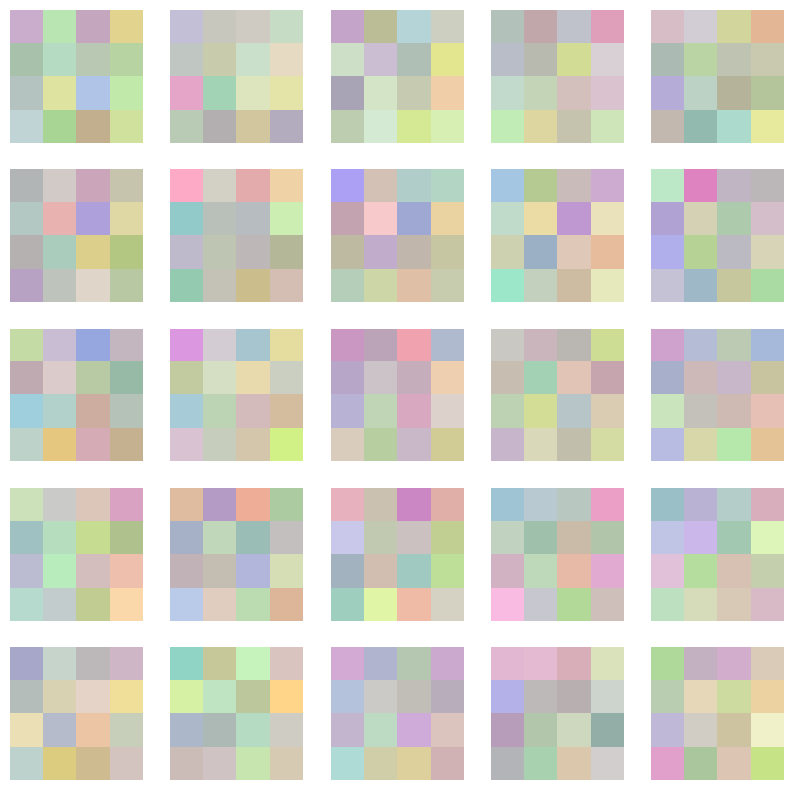

>Saved: fake_plot_004x004-tuned.png
1/1 [==============================] - 0s 23ms/step


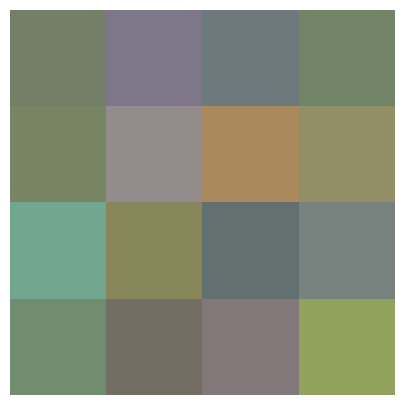

(4, 4)
(3202, 4, 4, 3)
Scaled Data (3202, 4, 4, 3)
1/1 [==============================] - 0s 24ms/step
>1, d1=-0.004, d2=0.014, d3=0.000, g=0.016
1/1 [==============================] - 0s 22ms/step
>2, d1=-0.094, d2=0.320, d3=0.000, g=-0.017
1/1 [==============================] - 0s 23ms/step
>3, d1=-0.063, d2=0.183, d3=0.000, g=-0.012
1/1 [==============================] - 0s 23ms/step
>4, d1=-0.043, d2=0.121, d3=0.000, g=-0.007
1/1 [==============================] - 0s 23ms/step
>5, d1=-0.029, d2=0.083, d3=0.000, g=-0.010
1/1 [==============================] - 0s 22ms/step
>6, d1=-0.019, d2=0.060, d3=0.000, g=-0.015
1/1 [==============================] - 0s 23ms/step
>7, d1=-0.019, d2=0.051, d3=0.000, g=-0.014
1/1 [==============================] - 0s 23ms/step
>8, d1=-0.014, d2=0.041, d3=0.000, g=-0.011
1/1 [==============================] - 0s 22ms/step
>9, d1=-0.009, d2=0.031, d3=0.000, g=-0.007
1/1 [==============================] - 0s 23ms/step
>10, d1=-0.006, d2=0.020, d3=0.000

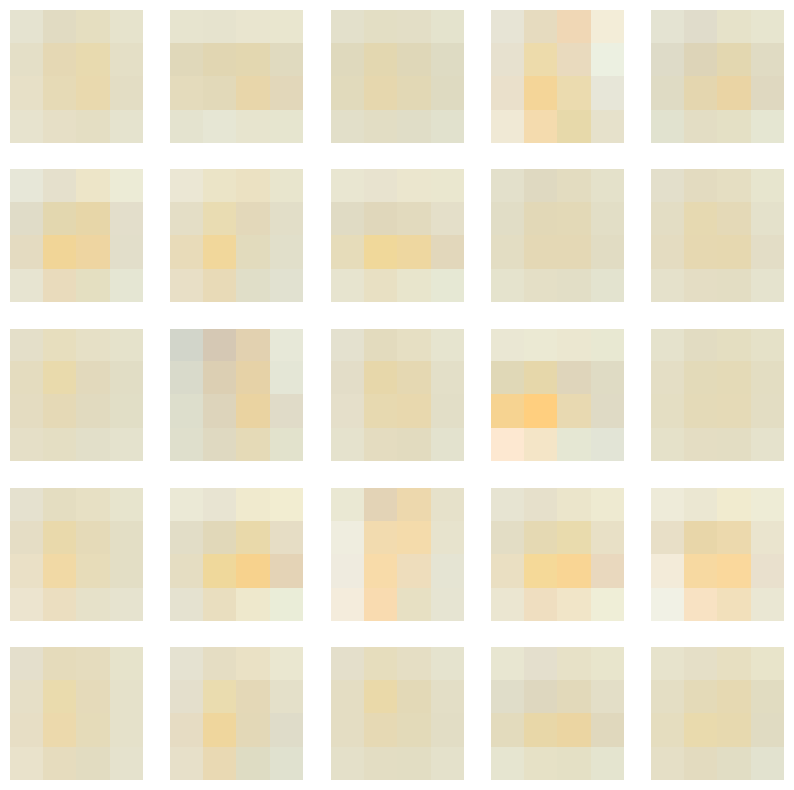

>Saved: fake_plot_004x004-tuned.png
1/1 [==============================] - 0s 23ms/step


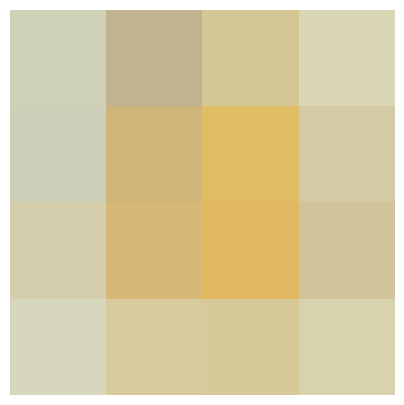

Scaled Data (3202, 8, 8, 3)
1/1 [==============================] - 0s 157ms/step
>1, d1=-0.040, d2=0.035, d3=0.000, g=0.022
1/1 [==============================] - 0s 23ms/step
>2, d1=-0.060, d2=0.110, d3=0.000, g=0.010
1/1 [==============================] - 0s 22ms/step
>3, d1=-0.079, d2=0.135, d3=0.000, g=0.005
1/1 [==============================] - 0s 22ms/step
>4, d1=-0.073, d2=0.138, d3=0.000, g=-0.010
1/1 [==============================] - 0s 22ms/step
>5, d1=-0.079, d2=0.159, d3=0.000, g=-0.021
1/1 [==============================] - 0s 23ms/step
>6, d1=-0.041, d2=0.128, d3=0.000, g=-0.031
1/1 [==============================] - 0s 22ms/step
>7, d1=-0.032, d2=0.098, d3=0.000, g=-0.022
1/1 [==============================] - 0s 22ms/step
>8, d1=-0.023, d2=0.059, d3=0.000, g=0.007
1/1 [==============================] - 0s 23ms/step
>9, d1=-0.015, d2=0.037, d3=0.000, g=0.000
1/1 [==============================] - 0s 22ms/step
>10, d1=-0.017, d2=0.032, d3=0.000, g=-0.005
1/1 [==========

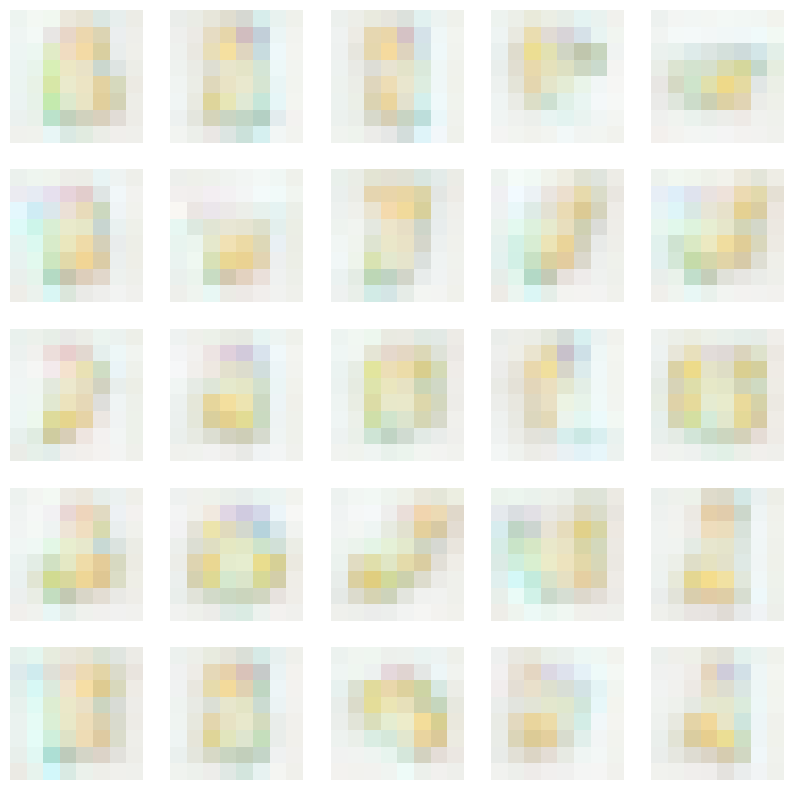

>Saved: fake_plot_008x008-faded.png
1/1 [==============================] - 0s 23ms/step


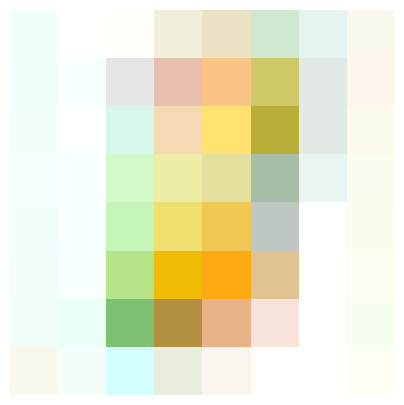

Scaled Data (3202, 8, 8, 3)
1/1 [==============================] - 0s 139ms/step
>1, d1=-10.804, d2=-2.737, d3=0.000, g=2.284
1/1 [==============================] - 0s 22ms/step
>2, d1=-13.478, d2=15.853, d3=0.000, g=6.310
1/1 [==============================] - 0s 22ms/step
>3, d1=-12.415, d2=9.832, d3=0.000, g=13.771
1/1 [==============================] - 0s 23ms/step
>4, d1=-15.914, d2=-5.245, d3=0.000, g=12.502
1/1 [==============================] - 0s 22ms/step
>5, d1=-10.519, d2=-3.619, d3=0.000, g=27.400
1/1 [==============================] - 0s 22ms/step
>6, d1=-5.652, d2=-4.460, d3=0.000, g=7.952
1/1 [==============================] - 0s 22ms/step
>7, d1=-3.310, d2=-4.717, d3=0.000, g=1.009
1/1 [==============================] - 0s 23ms/step
>8, d1=-11.193, d2=24.103, d3=0.000, g=3.998
1/1 [==============================] - 0s 22ms/step
>9, d1=-18.422, d2=3.346, d3=0.000, g=30.778
1/1 [==============================] - 0s 22ms/step
>10, d1=-4.509, d2=-2.918, d3=0.000, g=5.705
1

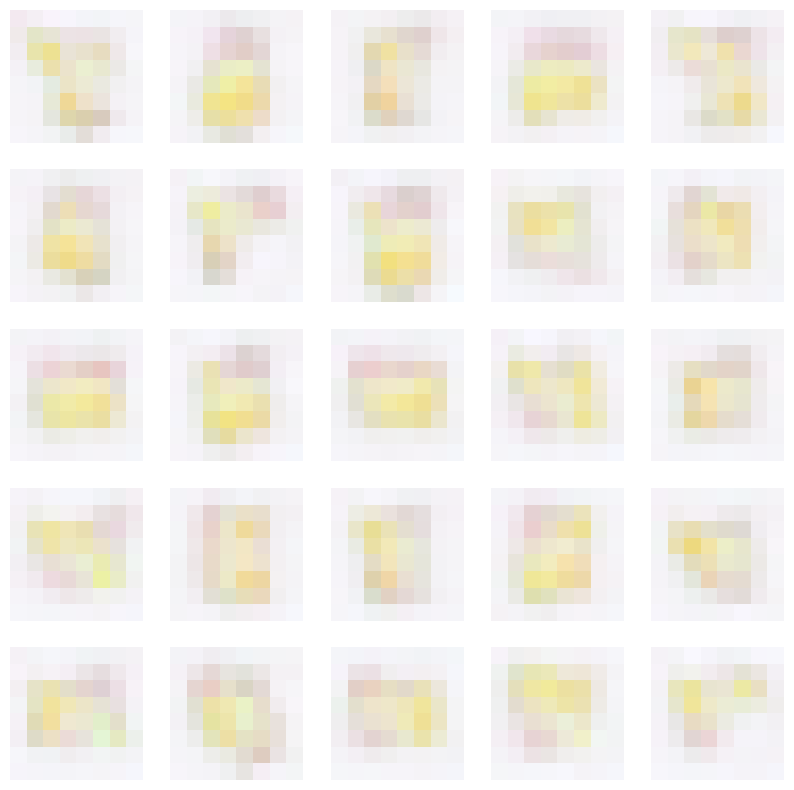

>Saved: fake_plot_008x008-tuned.png
1/1 [==============================] - 0s 24ms/step


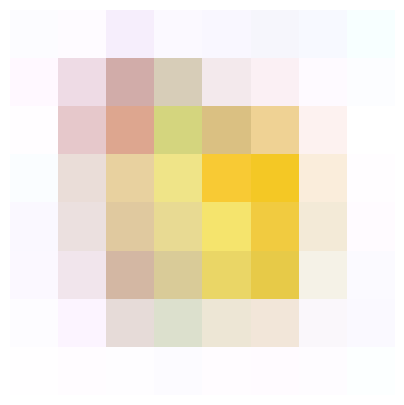

Streaming output truncated to the last 5000 lines.
>301, d1=-1980.935, d2=1689.618, d3=0.000, g=-861.689
1/1 [==============================] - 0s 22ms/step
>302, d1=-2253.012, d2=2719.487, d3=0.000, g=-656.916
1/1 [==============================] - 0s 22ms/step
>303, d1=-1699.142, d2=-472.861, d3=0.000, g=1923.089
1/1 [==============================] - 0s 22ms/step
>304, d1=-519.170, d2=1369.983, d3=0.000, g=-1076.188
1/1 [==============================] - 0s 23ms/step
>305, d1=-2679.755, d2=2577.390, d3=0.000, g=212.781
1/1 [==============================] - 0s 22ms/step
>306, d1=-1213.489, d2=1645.111, d3=0.000, g=449.923
1/1 [==============================] - 0s 22ms/step
>307, d1=-1512.545, d2=1628.870, d3=0.000, g=648.173
1/1 [==============================] - 0s 23ms/step
>308, d1=-798.629, d2=1107.340, d3=0.000, g=209.804
1/1 [==============================] - 0s 22ms/step
>309, d1=-937.880, d2=1227.383, d3=0.000, g=165.003
1/1 [==============================] - 0s 23ms/step
>3

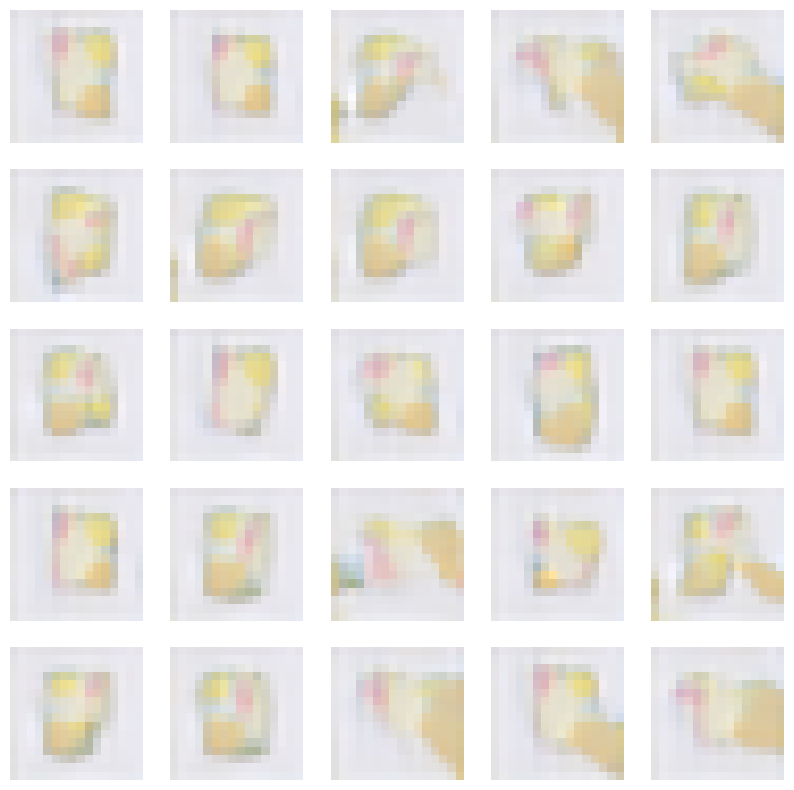

>Saved: fake_plot_016x016-faded.png
1/1 [==============================] - 0s 22ms/step


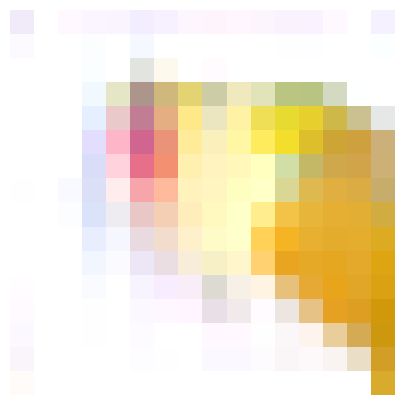

Streaming output truncated to the last 5000 lines.
>301, d1=-320644416.000, d2=517216032.000, d3=0.000, g=-365006336.000
1/1 [==============================] - 0s 22ms/step
>302, d1=-531853696.000, d2=445058016.000, d3=0.000, g=-247315248.000
1/1 [==============================] - 0s 22ms/step
>303, d1=-377784608.000, d2=582324352.000, d3=0.000, g=14408452.000
1/1 [==============================] - 0s 22ms/step
>304, d1=-121452416.000, d2=578274816.000, d3=0.000, g=-142904416.000
1/1 [==============================] - 0s 22ms/step
>305, d1=-287343584.000, d2=397034176.000, d3=0.000, g=-198616256.000
1/1 [==============================] - 0s 22ms/step
>306, d1=-495472704.000, d2=466505216.000, d3=0.000, g=-416389152.000
1/1 [==============================] - 0s 23ms/step
>307, d1=-433669824.000, d2=453818880.000, d3=0.000, g=-357193728.000
1/1 [==============================] - 0s 22ms/step
>308, d1=-353212960.000, d2=540482624.000, d3=0.000, g=-135068208.000
1/1 [======================

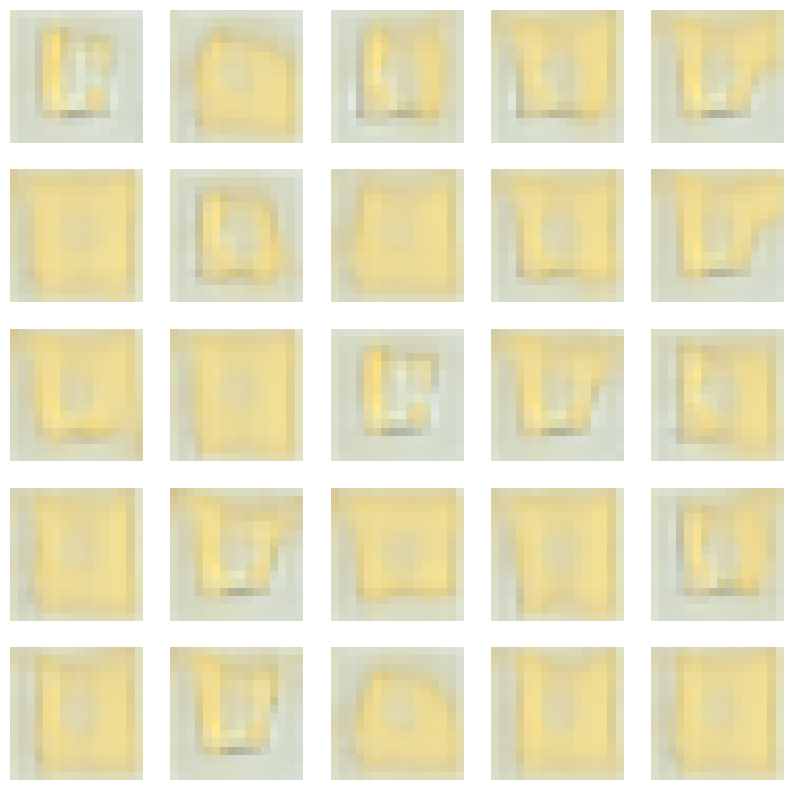

>Saved: fake_plot_016x016-tuned.png
1/1 [==============================] - 0s 22ms/step


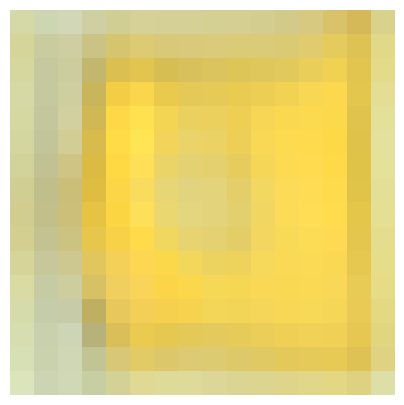

Streaming output truncated to the last 5000 lines.
>4701, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>4702, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>4703, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 22ms/step
>4704, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>4705, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>4706, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>4707, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>4708, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 26ms/step
>4709, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>4710, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>4711, d1=nan, d2=nan, d3=nan, g=nan
1/1 [=================

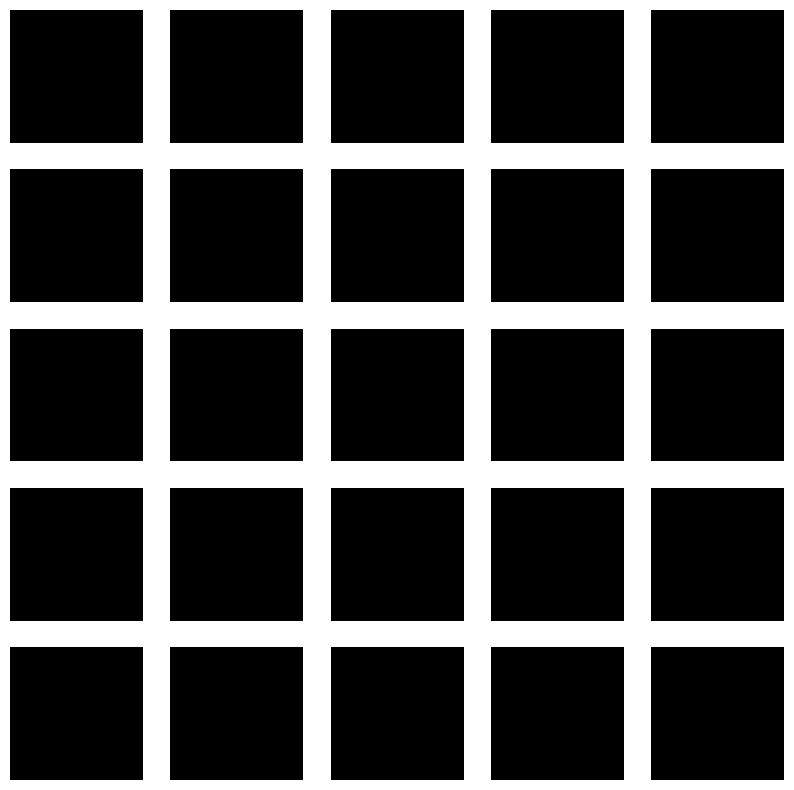

>Saved: fake_plot_032x032-faded.png
1/1 [==============================] - 0s 23ms/step


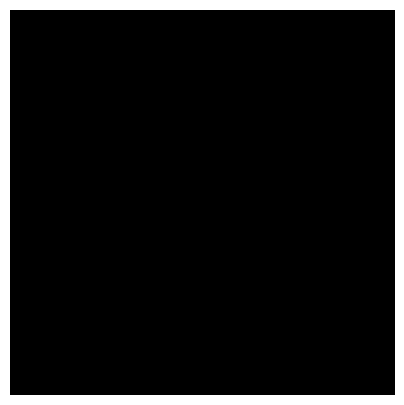

Streaming output truncated to the last 5000 lines.
>4701, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 25ms/step
>4702, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>4703, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>4704, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 25ms/step
>4705, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>4706, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>4707, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>4708, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>4709, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>4710, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 27ms/step
>4711, d1=nan, d2=nan, d3=nan, g=nan
1/1 [=================

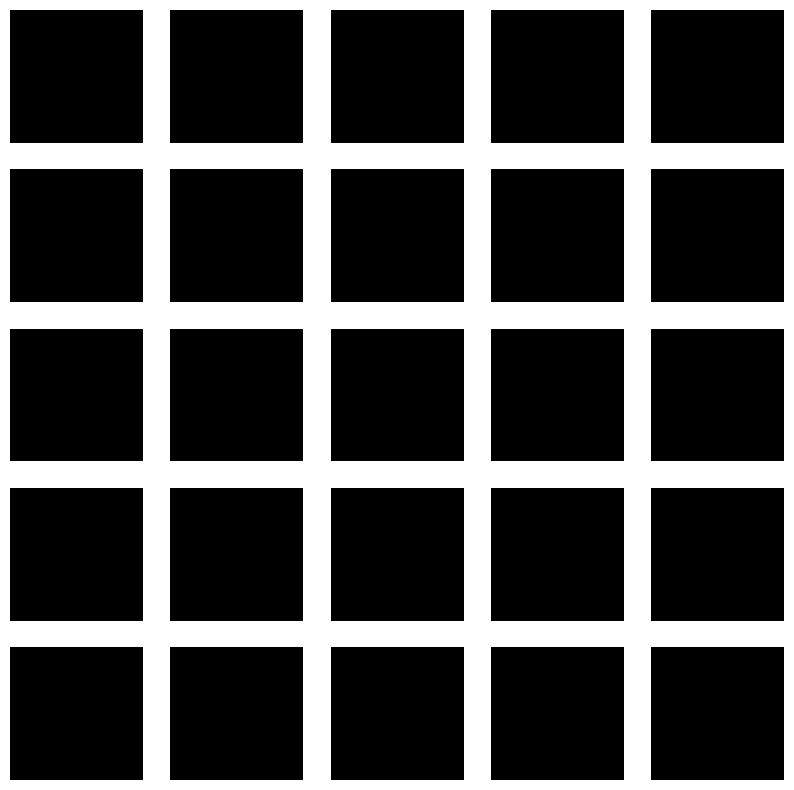

>Saved: fake_plot_032x032-tuned.png
1/1 [==============================] - 0s 24ms/step


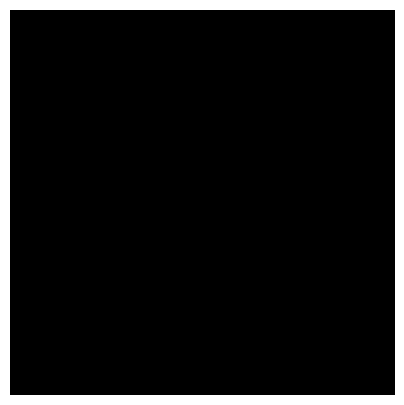

Streaming output truncated to the last 5000 lines.
>13501, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 29ms/step
>13502, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 28ms/step
>13503, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 36ms/step
>13504, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 28ms/step
>13505, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 37ms/step
>13506, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 27ms/step
>13507, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 29ms/step
>13508, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 30ms/step
>13509, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 29ms/step
>13510, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 27ms/step
>13511, d1=nan, d2=nan, d3=nan, g=nan
1/1 [======

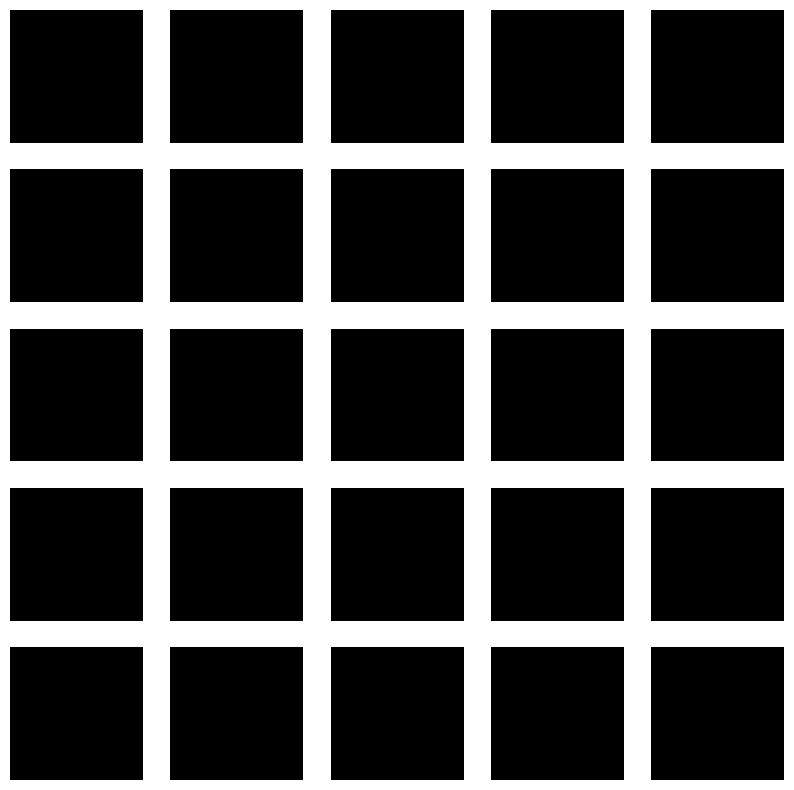

>Saved: fake_plot_064x064-faded.png
1/1 [==============================] - 0s 30ms/step


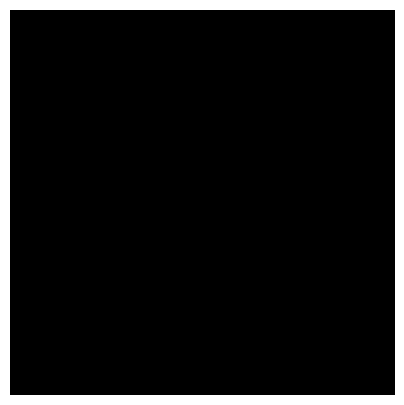

Streaming output truncated to the last 5000 lines.
>3326, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>3327, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>3328, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>3329, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>3330, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>3331, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>3332, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>3333, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>3334, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 33ms/step
>3335, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>3336, d1=nan, d2=nan, d3=nan, g=nan
1/1 [=================

In [ ]:
# number of growth phases where 6 blocks == [4, 8, 16, 32, 64, 128]
n_blocks = 6
latent_dim = 100



# print(train_images.shape, len(train_images))
# print(train_descriptions.shape, len(train_descriptions))
# print(train_embeddings_reduced.shape, len(train_embeddings_reduced))
print('Loaded', len(train_images))

d_models = define_discriminator(n_blocks)
g_models = define_generator(latent_dim,256,  n_blocks)
gan_models = define_composite(d_models, g_models)


n_batch = [16, 16, 16, 8, 4, 4]
n_epochs = [10, 10, 14, 18, 20, 25]

train(g_models, d_models, gan_models, train_images,train_embeddings_reduced,train_descriptions ,latent_dim, n_epochs, n_epochs, n_batch)

In [ ]:
# Define the file path where you want to save the model
model_file_path = 'model_gan_32x32_block3_0.h5'

# Save the model
g_models[3][0].save(model_file_path)

Loaded 3202


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


8/8 [==============================] - 1s 10ms/step


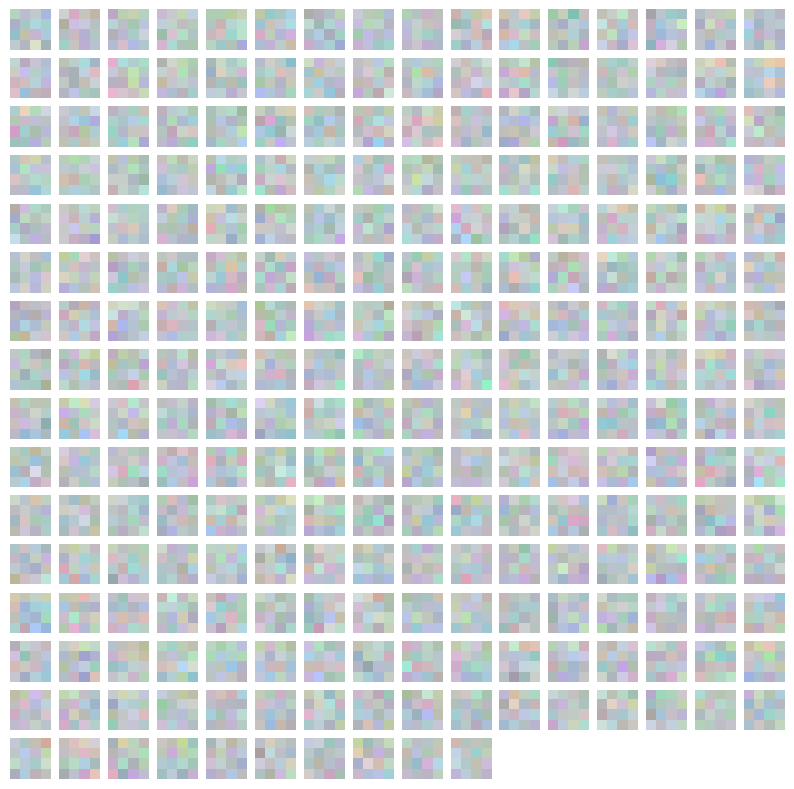

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


>Saved: plot_004x004-tuned.png
1/1 [==============================] - 0s 105ms/step


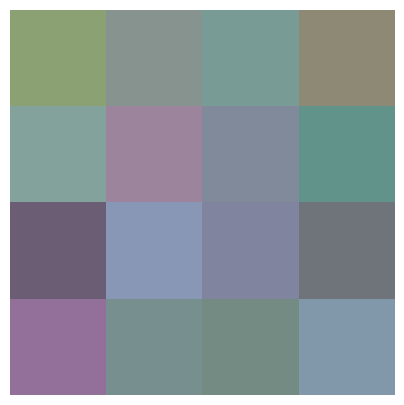

(4, 4)
(3202, 4, 4, 3)
Scaled Data (3202, 4, 4, 3)
1/1 [==============================] - 0s 70ms/step
>1, d1=-0.005, d2=0.028, d3=0.000, g=0.007
1/1 [==============================] - 0s 21ms/step
>2, d1=-0.068, d2=0.217, d3=0.000, g=0.014
1/1 [==============================] - 0s 22ms/step
>3, d1=-0.041, d2=0.151, d3=0.000, g=0.002
1/1 [==============================] - 0s 21ms/step
>4, d1=-0.036, d2=0.095, d3=0.000, g=-0.022
1/1 [==============================] - 0s 21ms/step
>5, d1=-0.044, d2=0.127, d3=0.000, g=-0.024
1/1 [==============================] - 0s 21ms/step
>6, d1=-0.029, d2=0.086, d3=0.000, g=-0.017
1/1 [==============================] - 0s 22ms/step
>7, d1=-0.016, d2=0.048, d3=0.000, g=-0.011
1/1 [==============================] - 0s 21ms/step
>8, d1=-0.009, d2=0.032, d3=0.000, g=-0.008
1/1 [==============================] - 0s 21ms/step
>9, d1=-0.006, d2=0.020, d3=0.000, g=-0.004
1/1 [==============================] - 0s 21ms/step
>10, d1=-0.004, d2=0.014, d3=0.000, 

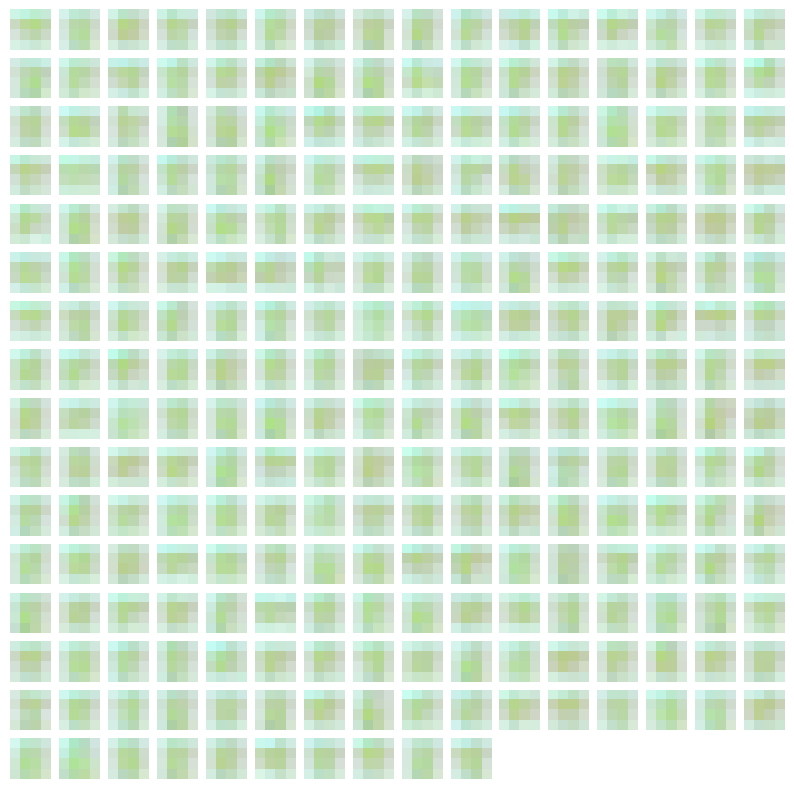

>Saved: plot_004x004-tuned.png
1/1 [==============================] - 0s 23ms/step


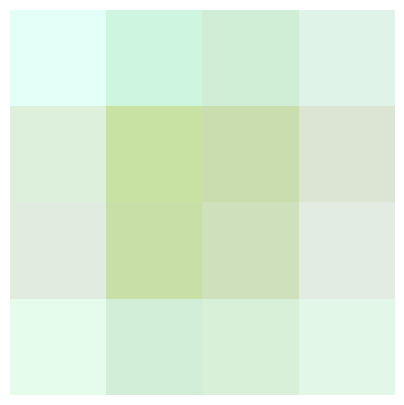

Scaled Data (3202, 8, 8, 3)
1/1 [==============================] - 0s 210ms/step
>1, d1=0.011, d2=0.020, d3=0.000, g=0.015
1/1 [==============================] - 0s 22ms/step
>2, d1=0.006, d2=0.013, d3=0.000, g=0.005
1/1 [==============================] - 0s 22ms/step
>3, d1=0.002, d2=0.012, d3=0.000, g=0.031
1/1 [==============================] - 0s 23ms/step
>4, d1=0.013, d2=0.001, d3=0.000, g=0.043
1/1 [==============================] - 0s 23ms/step
>5, d1=0.033, d2=0.009, d3=0.000, g=0.005
1/1 [==============================] - 0s 24ms/step
>6, d1=-0.001, d2=0.010, d3=0.000, g=0.004
1/1 [==============================] - 0s 23ms/step
>7, d1=-0.007, d2=0.048, d3=0.000, g=-0.004
1/1 [==============================] - 0s 23ms/step
>8, d1=-0.010, d2=0.032, d3=0.000, g=-0.002
1/1 [==============================] - 0s 22ms/step
>9, d1=-0.012, d2=0.017, d3=0.000, g=-0.001
1/1 [==============================] - 0s 22ms/step
>10, d1=-0.013, d2=0.023, d3=0.000, g=-0.005
1/1 [================

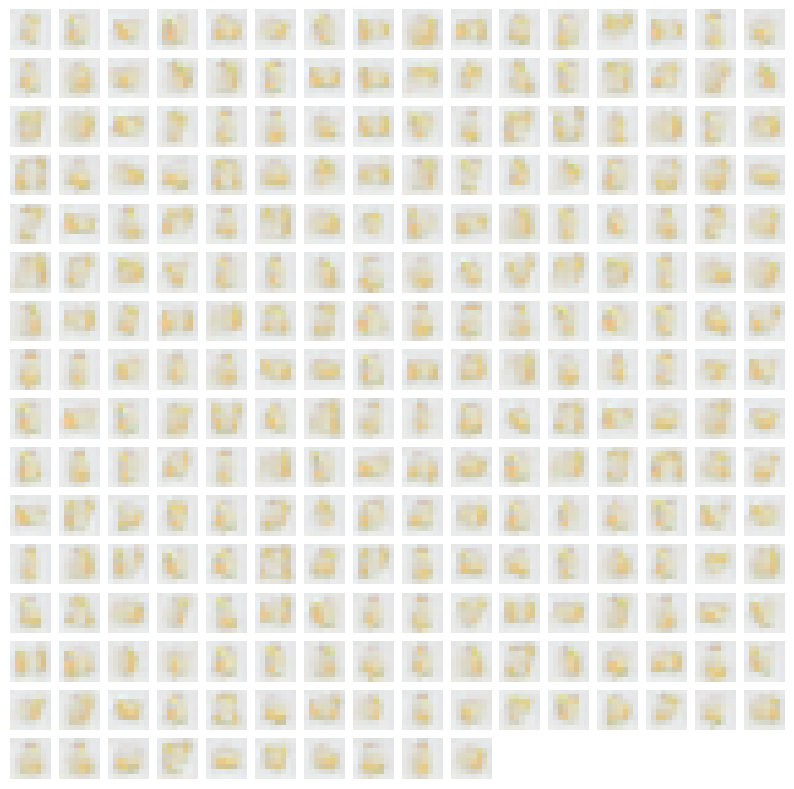

>Saved: plot_008x008-faded.png
1/1 [==============================] - 0s 70ms/step


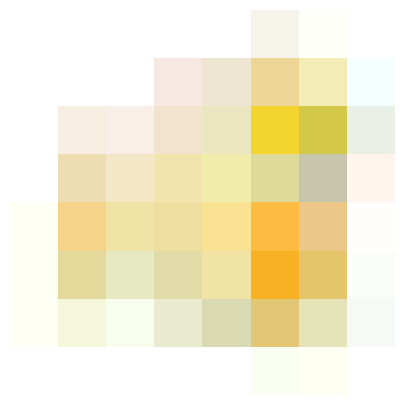

Scaled Data (3202, 8, 8, 3)
1/1 [==============================] - 0s 129ms/step
>1, d1=-0.160, d2=0.170, d3=0.000, g=-0.055
1/1 [==============================] - 0s 23ms/step
>2, d1=-0.351, d2=0.390, d3=0.000, g=-0.049
1/1 [==============================] - 0s 22ms/step
>3, d1=-0.169, d2=0.449, d3=0.000, g=-0.115
1/1 [==============================] - 0s 23ms/step
>4, d1=-0.114, d2=0.444, d3=0.000, g=0.028
1/1 [==============================] - 0s 22ms/step
>5, d1=-0.168, d2=0.189, d3=0.000, g=-0.060
1/1 [==============================] - 0s 22ms/step
>6, d1=-0.382, d2=0.449, d3=0.000, g=-0.079
1/1 [==============================] - 0s 21ms/step
>7, d1=-0.166, d2=0.396, d3=0.000, g=-0.025
1/1 [==============================] - 0s 22ms/step
>8, d1=-0.167, d2=0.234, d3=0.000, g=0.129
1/1 [==============================] - 0s 22ms/step
>9, d1=-0.206, d2=0.137, d3=0.000, g=0.296
1/1 [==============================] - 0s 23ms/step
>10, d1=-0.065, d2=0.167, d3=0.000, g=0.112
1/1 [=========

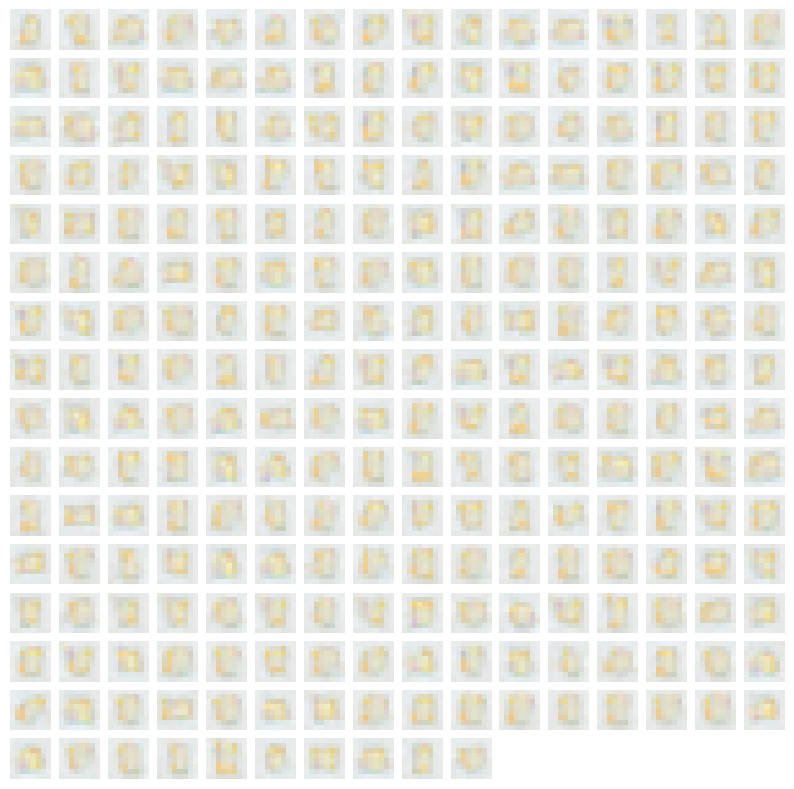

>Saved: plot_008x008-tuned.png
1/1 [==============================] - 0s 27ms/step


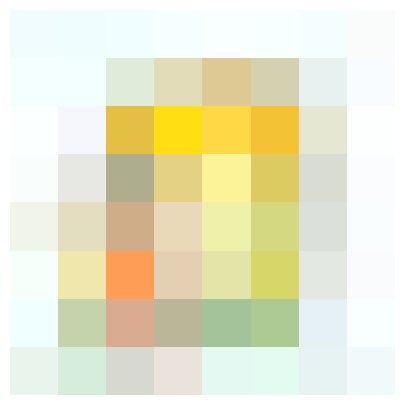

Scaled Data (3202, 16, 16, 3)
1/1 [==============================] - 0s 243ms/step
>1, d1=-8.263, d2=12.316, d3=0.000, g=-6.179
1/1 [==============================] - 0s 22ms/step
>2, d1=-11.677, d2=12.084, d3=0.000, g=-4.734
1/1 [==============================] - 0s 22ms/step
>3, d1=-11.031, d2=6.181, d3=0.000, g=0.204
1/1 [==============================] - 0s 22ms/step
>4, d1=-6.395, d2=17.748, d3=0.000, g=-3.143
1/1 [==============================] - 0s 22ms/step
>5, d1=-16.113, d2=6.654, d3=0.000, g=-2.018
1/1 [==============================] - 0s 25ms/step
>6, d1=-12.552, d2=17.396, d3=0.000, g=0.755
1/1 [==============================] - 0s 21ms/step
>7, d1=-9.275, d2=11.133, d3=0.000, g=1.982
1/1 [==============================] - 0s 22ms/step
>8, d1=-9.632, d2=4.568, d3=0.000, g=2.133
1/1 [==============================] - 0s 22ms/step
>9, d1=-12.704, d2=6.032, d3=0.000, g=-1.358
1/1 [==============================] - 0s 22ms/step
>10, d1=-14.837, d2=4.899, d3=0.000, g=5.876
1/

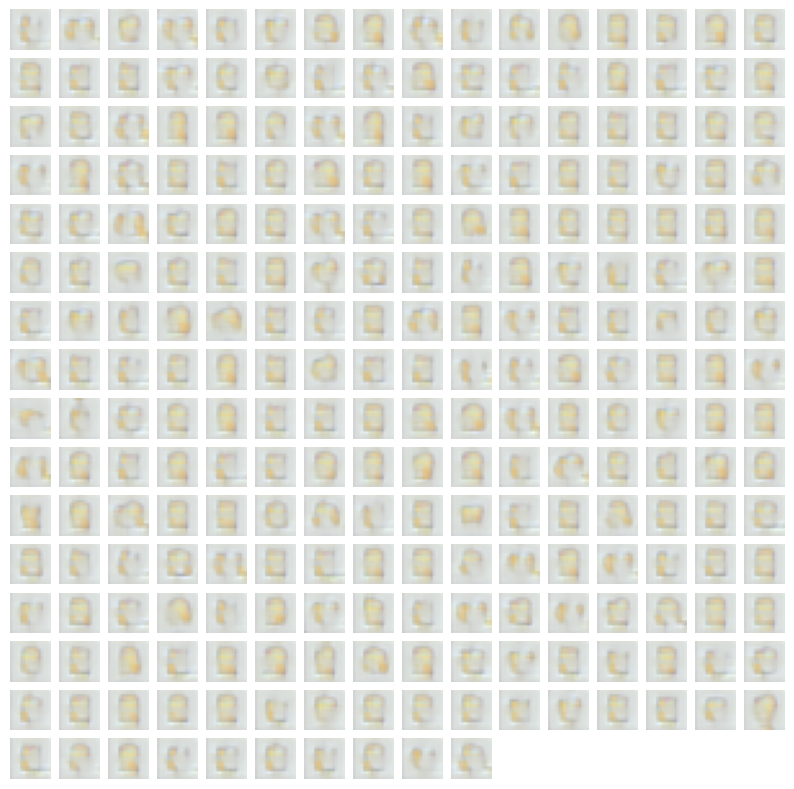

>Saved: plot_016x016-faded.png
1/1 [==============================] - 0s 74ms/step


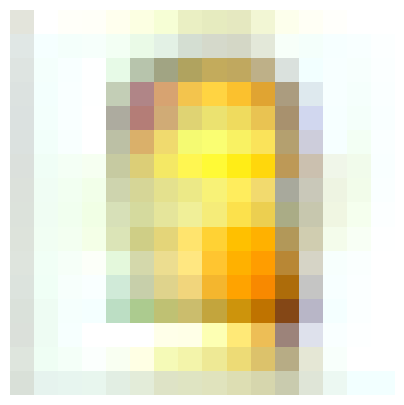

Scaled Data (3202, 16, 16, 3)
1/1 [==============================] - 0s 169ms/step
>1, d1=-1925283.250, d2=1709186.750, d3=0.000, g=168604.969
1/1 [==============================] - 0s 22ms/step
>2, d1=-2102400.750, d2=1993263.000, d3=0.000, g=-460219.812
1/1 [==============================] - 0s 22ms/step
>3, d1=-2268353.000, d2=1406107.500, d3=0.000, g=-230008.609
1/1 [==============================] - 0s 22ms/step
>4, d1=-2929103.750, d2=2437499.250, d3=0.000, g=-662648.125
1/1 [==============================] - 0s 22ms/step
>5, d1=-1913625.625, d2=2489841.750, d3=0.000, g=-543793.812
1/1 [==============================] - 0s 22ms/step
>6, d1=-3528836.000, d2=2674855.500, d3=0.000, g=-56017.145
1/1 [==============================] - 0s 24ms/step
>7, d1=-2654706.500, d2=3106896.250, d3=0.000, g=-490503.750
1/1 [==============================] - 0s 23ms/step
>8, d1=-2091196.625, d2=1917615.250, d3=0.000, g=-227475.266
1/1 [==============================] - 0s 23ms/step
>9, d1=-2408697

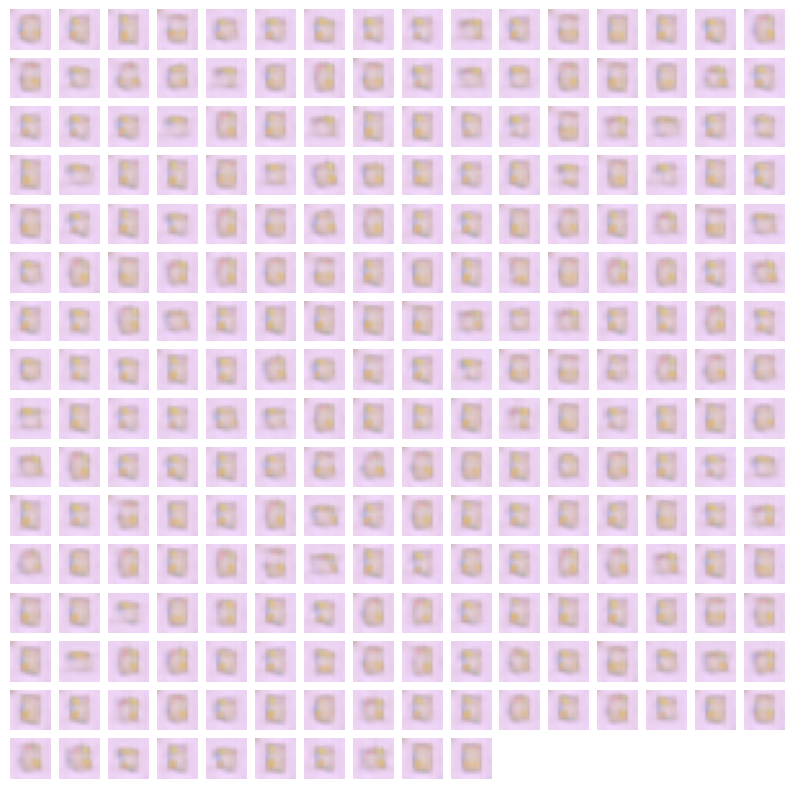

>Saved: plot_016x016-tuned.png
1/1 [==============================] - 0s 26ms/step


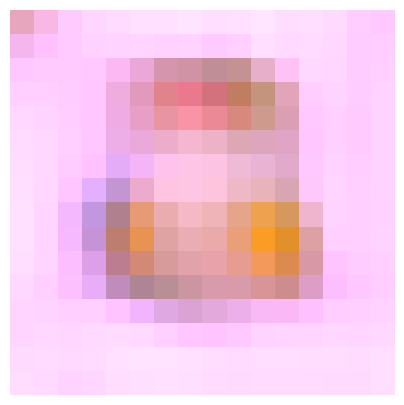

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step
>1502, d1=-880417580706168832.000, d2=951319038267490304.000, d3=0.000, g=-862325460468498432.000
1/1 [==============================] - 0s 23ms/step
>1503, d1=-873803537228759040.000, d2=940337940762984448.000, d3=0.000, g=-857538461719068672.000
1/1 [==============================] - 0s 24ms/step
>1504, d1=-869252589881917440.000, d2=932952933476073472.000, d3=0.000, g=-853549227375067136.000
1/1 [==============================] - 0s 23ms/step
>1505, d1=-866313526581395456.000, d2=926448222686150656.000, d3=0.000, g=-849770961824645120.000
1/1 [==============================] - 0s 23ms/step
>1506, d1=-862531344020799488.000, d2=923403125233025024.000, d3=0.000, g=-850896655573057536.000
1/1 [==============================] - 0s 24ms/step
>1507, d1=-863205138490195968.000, d2=922164044347998208.000, d3=0.000, g=-848396366131494912.000
1/1 [==============================] - 0s 23ms/st

/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


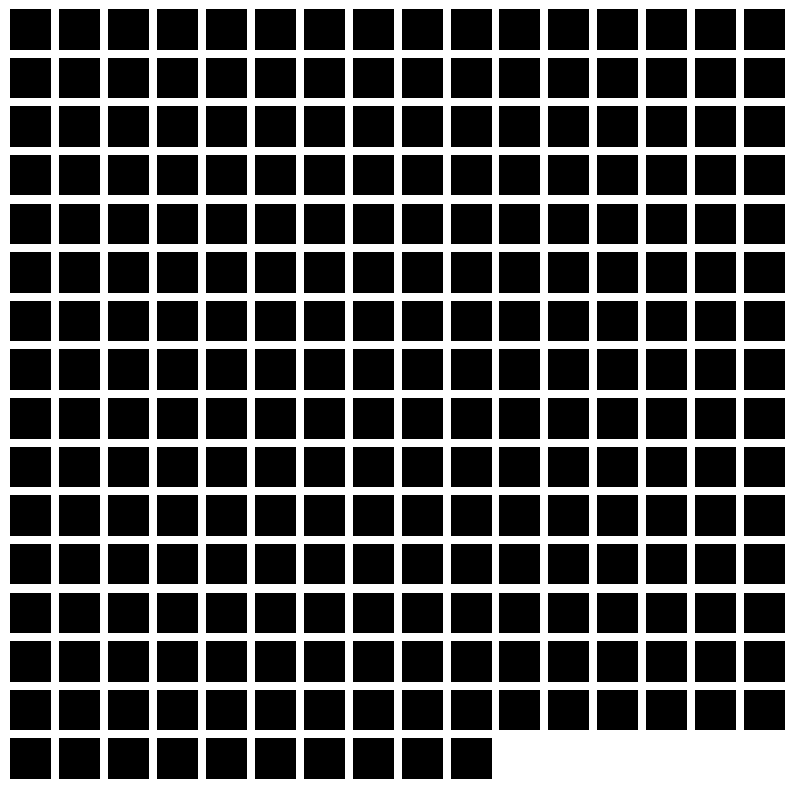

>Saved: plot_032x032-faded.png
1/1 [==============================] - 0s 83ms/step


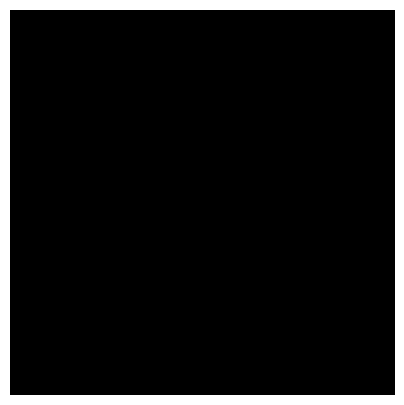

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step
>1502, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 22ms/step
>1503, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>1504, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>1505, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 22ms/step
>1506, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 22ms/step
>1507, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 22ms/step
>1508, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 22ms/step
>1509, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>1510, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 22ms/step
>1511, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>1512, 

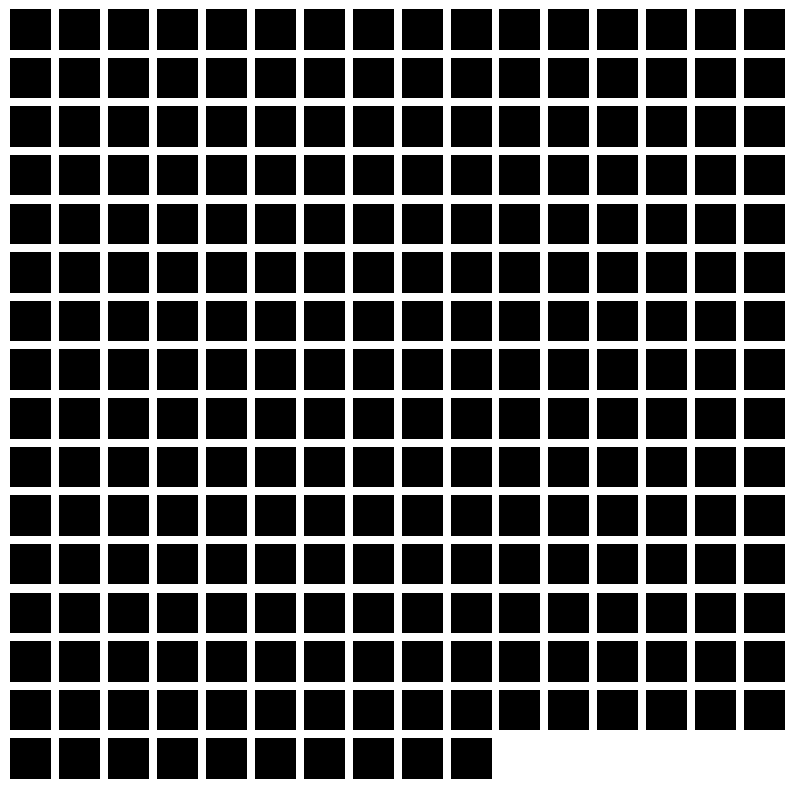

>Saved: plot_032x032-tuned.png
1/1 [==============================] - 0s 27ms/step


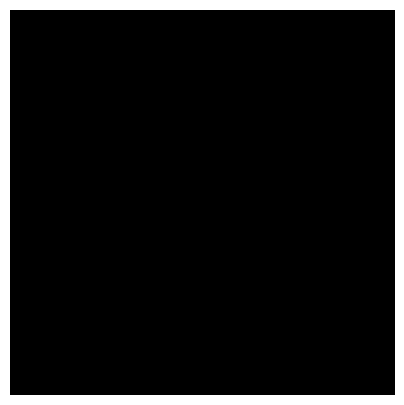

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step
>5502, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5503, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5504, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5505, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5506, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5507, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 25ms/step
>5508, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5509, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5510, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5511, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5512, 

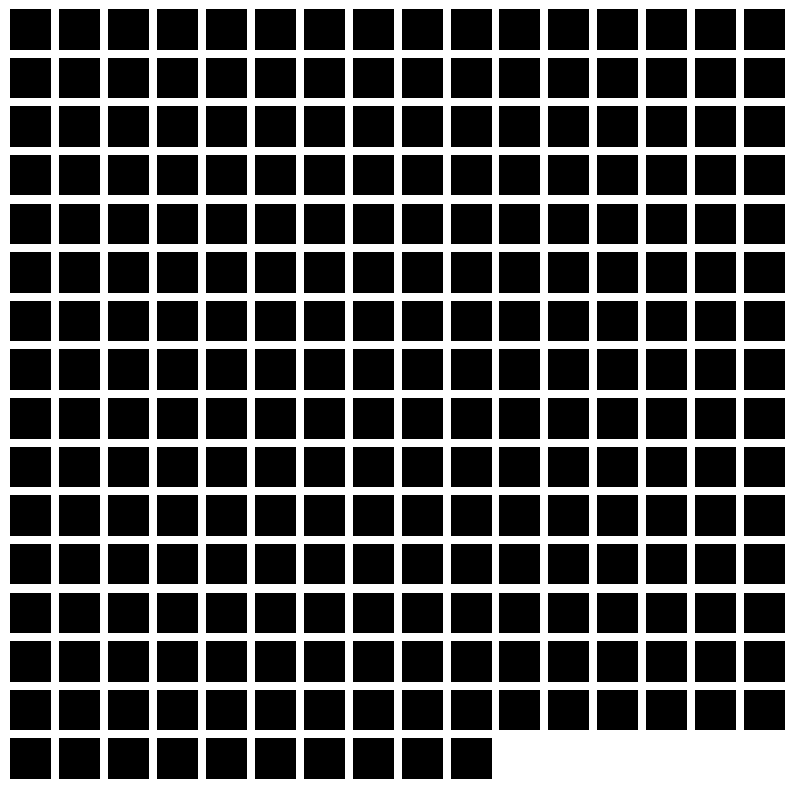

>Saved: plot_064x064-faded.png
1/1 [==============================] - 0s 80ms/step


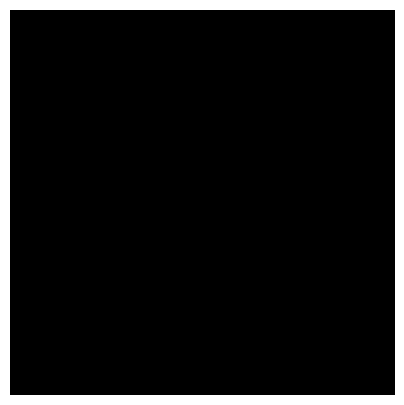

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step
>5502, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5503, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5504, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5505, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 22ms/step
>5506, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 22ms/step
>5507, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 28ms/step
>5508, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5509, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5510, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5511, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5512, 

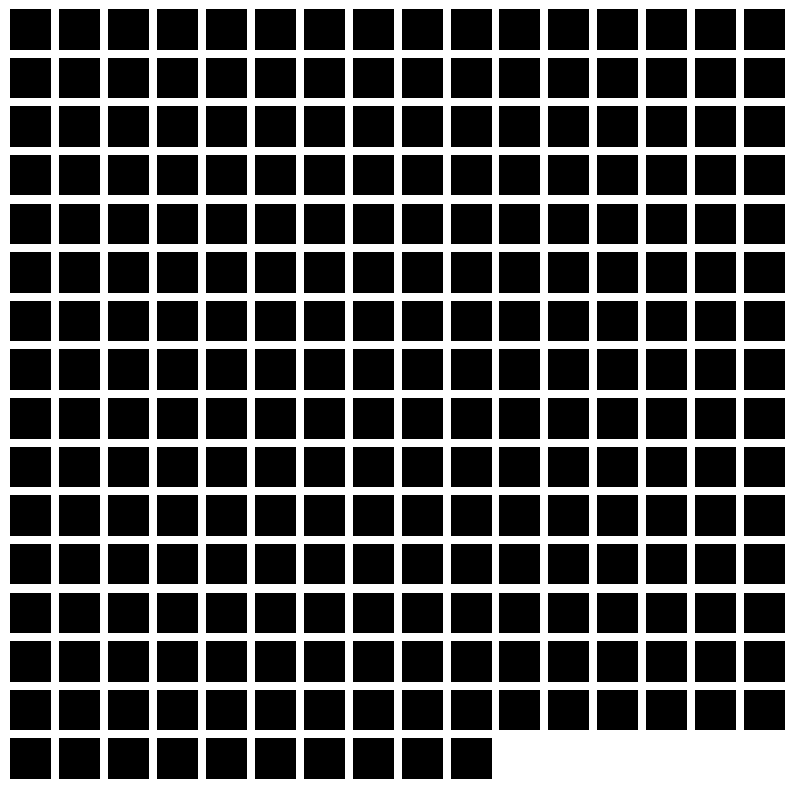

>Saved: plot_064x064-tuned.png
1/1 [==============================] - 0s 29ms/step


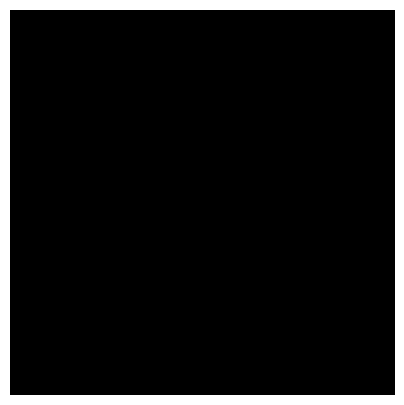

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step
>5502, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5503, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5504, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5505, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5506, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5507, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5508, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5509, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5510, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5511, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5512, 

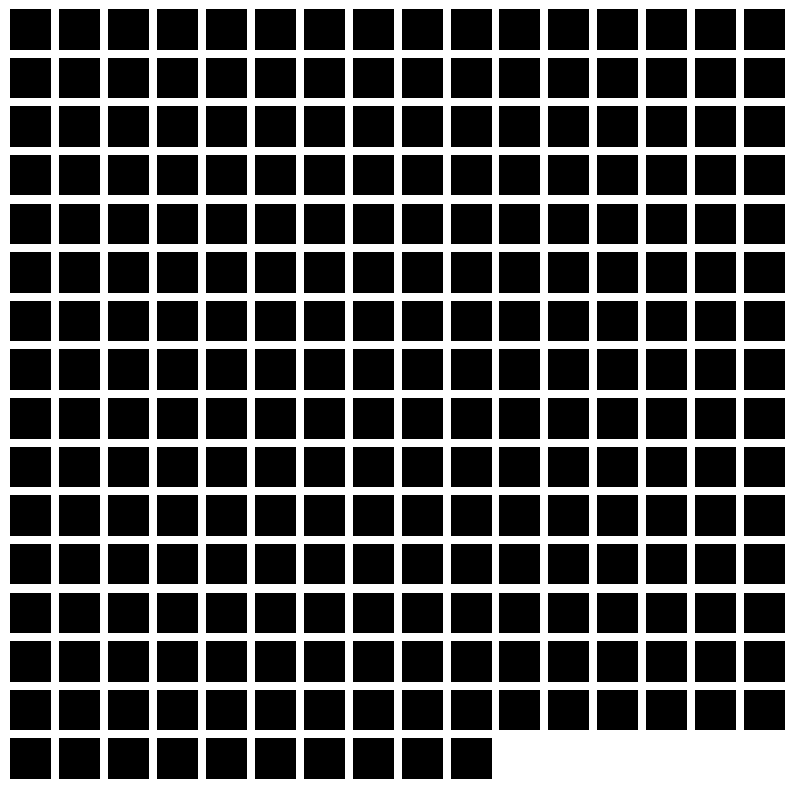

>Saved: plot_128x128-faded.png
1/1 [==============================] - 0s 104ms/step


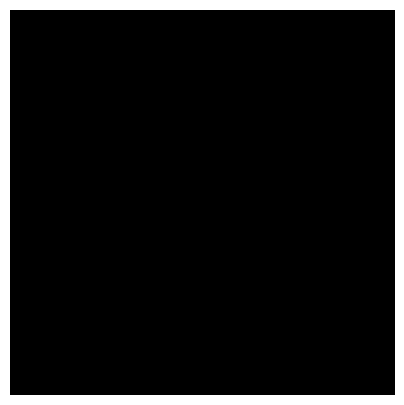

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step
>5502, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5503, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5504, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 25ms/step
>5505, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5506, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 24ms/step
>5507, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 32ms/step
>5508, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 30ms/step
>5509, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 25ms/step
>5510, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5511, d1=nan, d2=nan, d3=nan, g=nan
1/1 [==============================] - 0s 23ms/step
>5512, 

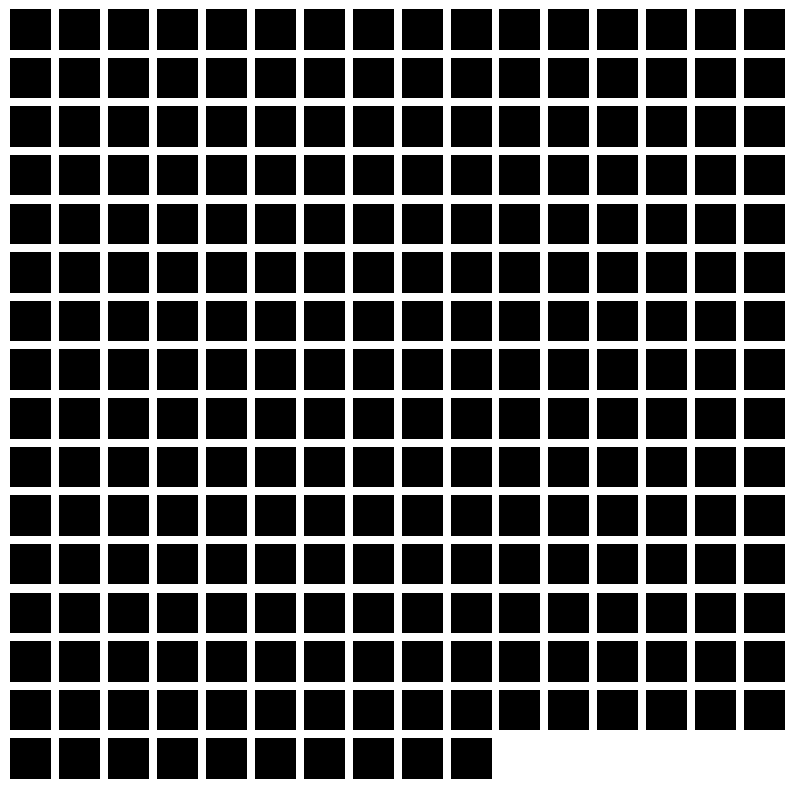

>Saved: plot_128x128-tuned.png
1/1 [==============================] - 0s 30ms/step


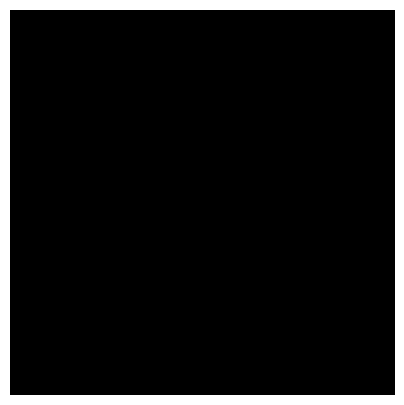

In [ ]:
# # number of growth phases where 6 blocks == [4, 8, 16, 32, 64, 128]
# n_blocks = 6
# latent_dim = 100



# # print(train_images.shape, len(train_images))
# # print(train_descriptions.shape, len(train_descriptions))
# # print(train_embeddings_reduced.shape, len(train_embeddings_reduced))
# print('Loaded', len(train_images))

# d_models = define_discriminator(n_blocks)
# g_models = define_generator(latent_dim,256,  n_blocks)
# gan_models = define_composite(d_models, g_models)


# n_batch = [16, 16, 16, 8, 4, 4]
# n_epochs = [5, 8, 8, 10, 10, 10]

# train(g_models, d_models, gan_models, train_images,train_embeddings_reduced,train_descriptions ,latent_dim, n_epochs, n_epochs, n_batch)

Loaded 3202


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


8/8 [==============================] - 0s 2ms/step


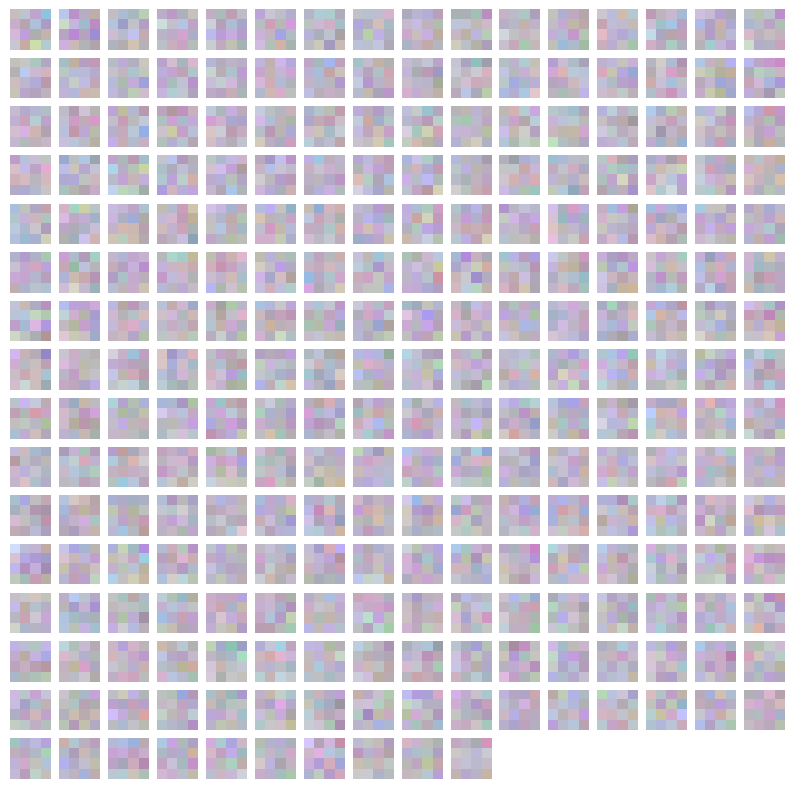

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


>Saved: plot_004x004-tuned.png
1/1 [==============================] - 0s 31ms/step


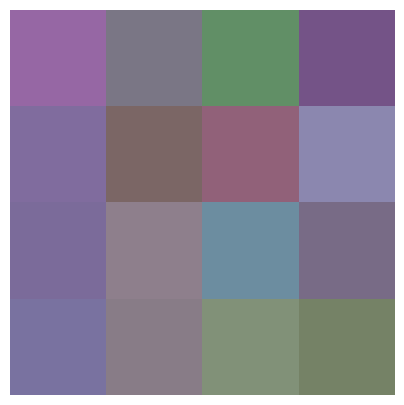

(4, 4)
(3202, 4, 4, 3)
Scaled Data (3202, 4, 4, 3)
1/1 [==============================] - 0s 29ms/step
>1, d1=0.007, d2=0.010, d3=0.000, g=0.017
1/1 [==============================] - 0s 24ms/step
>2, d1=-0.085, d2=0.233, d3=0.000, g=-0.008
1/1 [==============================] - 0s 23ms/step
>3, d1=-0.052, d2=0.144, d3=0.000, g=-0.008
1/1 [==============================] - 0s 24ms/step
>4, d1=-0.040, d2=0.127, d3=0.000, g=-0.024
1/1 [==============================] - 0s 24ms/step
>5, d1=-0.041, d2=0.106, d3=0.000, g=-0.026
1/1 [==============================] - 0s 23ms/step
>6, d1=-0.030, d2=0.081, d3=0.000, g=-0.021
1/1 [==============================] - 0s 23ms/step
>7, d1=-0.020, d2=0.055, d3=0.000, g=-0.015
1/1 [==============================] - 0s 24ms/step
>8, d1=-0.013, d2=0.038, d3=0.000, g=-0.010
1/1 [==============================] - 0s 24ms/step
>9, d1=-0.008, d2=0.026, d3=0.000, g=-0.005
1/1 [==============================] - 0s 25ms/step
>10, d1=-0.005, d2=0.018, d3=0.000,

In [ ]:
# number of growth phases where 6 blocks == [4, 8, 16, 32, 64, 128]
n_blocks = 6
latent_dim = 100



# print(train_images.shape, len(train_images))
# print(train_descriptions.shape, len(train_descriptions))
# print(train_embeddings_reduced.shape, len(train_embeddings_reduced))
print('Loaded', len(train_images))

d_models = define_discriminator(n_blocks)
g_models = define_generator(latent_dim,256,  n_blocks)
gan_models = define_composite(d_models, g_models)


n_batch = [16, 16, 16, 8, 4, 4]
n_epochs = [100, 100, 100, 100, 100, 100]

train(g_models, d_models, gan_models, train_images,train_embeddings_reduced,train_descriptions ,latent_dim, n_epochs, n_epochs, n_batch)

In [ ]:
# Assuming g_models is your list of models and g_models[3][0] is the specific model you want
g_model_ = g_models[2][0]  # Get the model first without loading weights
# g_model.load_weights('model_gan_32x32.h5', by_name=True, skip_mismatch=True)  # Now load the weights
# summarize_performance('tuned', g_model, latent_dim)


3/3 [==============================] - 0s 4ms/step


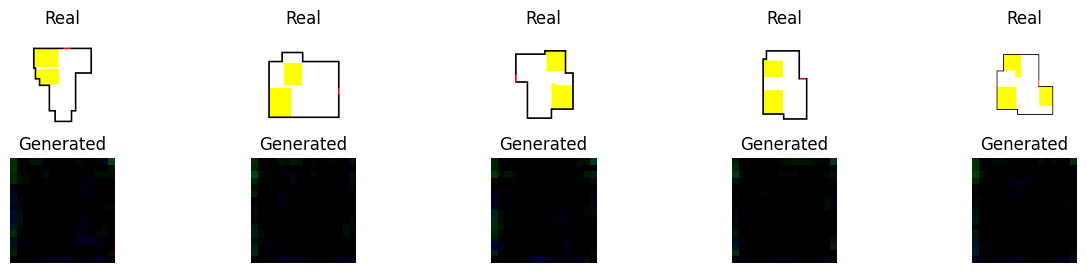

In [ ]:
def generate_latent_points(latent_dim, n_samples):
    # Generate points in the latent space
    return np.random.randn(latent_dim * n_samples).reshape(n_samples, latent_dim)

test_embeddings=test_embeddings[:, :new_embed_dim]
# Prepare inputs
latent_points = generate_latent_points(latent_dim, len(test_embeddings))  # latent_dim must be defined

# Use the generator to generate new images
generated_images = g_model_.predict([latent_points, test_embeddings])

# Step 3: Compare Generated Images
# Now, you might want to visualize the generated images and compare them to your test images
import matplotlib.pyplot as plt

def plot_images(real_images, generated_images, n_images=5):
    plt.figure(figsize=(15, 3))

    for i in range(n_images):
        # Plot real image
        ax = plt.subplot(2, n_images, i + 1)
        plt.imshow(real_images[i])
        plt.title("Real")
        plt.axis("off")

        # Plot generated image
        ax = plt.subplot(2, n_images, i + 1 + n_images)
        plt.imshow(generated_images[i])  # Assuming generated images are scaled from -1 to 1
        plt.title("Generated")
        plt.axis("off")

    plt.show()

# Plot some real images and corresponding generated images
plot_images(test_images, generated_images, n_images=5)

In [ ]:
g_models[-1]